# **Proje Ödevi**

### **Adım Adım Görevler**

#### **1. Problem Tanımı**
- **1.1. Hangi veri seti seçildi?**

- **1.2. Problemin amacı nedir? Hedef değişken nedir?**

- **1.3. Bu tahminin pratikteki önemi nedir?**

**1.1. Hangi veri seti seçildi?**

Veri seti, Kaggle üzerinde yer alan "Heart Disease Data" veri setidir. Veri seti, kalp hastalığına sahip olup olmama durumunu etkileyebilecek çeşitli tıbbi ve demografik faktörleri içermektedir.

Heart Disease Data Link: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data

**1.2. Problemin amacı nedir? Hedef değişken nedir?**

Bu problemin amacı, bireylerin sahip olduğu sağlık verilerine göre kalp hastalığı riski taşıyıp taşımadığını tahmin etmektir.

**Hedef değişken (Target Variable): num**

num = 1, 2, 3, 4 → Kişide kalp hastalığı var

num = 0 → Kişide kalp hastalığı yok 

olarak düzenlenecektir.

Bu, ikili sınıflandırma (binary classification) problemidir.

**1.3. Bu tahminin pratikteki önemi nedir?**

Kalp hastalıkları, dünya genelinde ölümlerin başlıca nedenlerinden biridir. Bu tür modeller sayesinde:

- Erken tanı ve önleyici tedbirler alınabilir.

- Doktorların karar destek süreçlerine katkı sağlanabilir.

- Sağlık sisteminin kaynakları daha verimli kullanılabilir.

- Riskli bireyler, daha detaylı incelemeye yönlendirilebilir.

Yani, bu tür bir tahmin modeli, toplum sağlığı açısından kritik öneme sahiptir ve hayat kurtarıcı potansiyele sahiptir.


#### **2. Veri Analizi ve Görselleştirme (EDA)**
   
- **2.1. df.info(), df.describe() çıktıları**

- **2.2. Eksik veri kontrolü**

- **2.3. Hedef değişkenin dağılımı**

- **2.4. En az 3 görsel: Korelasyonlar, dağılımlar veya kategorik etkileşimler**


**Gerekli Kütüphanelerin Import Edilmesi**

Öncelikle veri setinin analizi için gerekli kütüphaneleri içeriye aktarıyoruz.

In [126]:
# Gerekli kütüphaneleri import edelim

import pandas as pd                  # Veri analizi için gerekli
import numpy as np                   # Matematiksel işlemler için gerekli

import missingno as msno             # Eksik verilerin dağılımını görselleştirmek için gerekli kütüphane
import matplotlib.pyplot as plt      # Görselleştirme için gerekli
import seaborn as sns                # Görselleştirme için gerekli

import warnings                      # Uyarıları kapatmak adına gerekli kütüphane

# Tüm uyarıları kapat
warnings.filterwarnings("ignore")

**Veri Setinin Projeye Import Edilmesi**

Veri seti, kalp hastalığına sahip olup olmama durumunu etkileyebilecek çeşitli tıbbi ve demografik faktörleri içermektedir.

In [127]:
# CSV formatındaki veri setinin projeye dahil edilmesi ve bir DataFrame olarak projeye dahil edilmesi

df = pd.read_csv("heart_disease_uci.csv")

In [128]:
# DataFrame'i görüntüleyelim

df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


**Veri Setinin Genel Yapısını Gözlemleme**

- df.head() ile verinin baştan gözlemlerine erişelim,
- df.tail() ile verinin sondan gözlemlerine erişelim,
- df.shape() ile verinin boyut bilgisine erişelim.

In [129]:
# Verinin ilk 10 satırını getirelim

df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [130]:
# Hedef değişkenin değerlerine bakalım, ileride 2 sınıfa düşürülecektir. 0 ve 1 olarak düzenlenecektir.

df["num"].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

**Yorumlayalım:**
Veri setini daha yakından tanımak amacıyla tüm columnların ne anlama geldiğini daha detaylı açıklayalım.
- **id:**
    - Açıklama: Her bireye atanmış benzersiz kimlik numarasıdır.
    - Amaç: Veri setindeki kayıtları ayırt etmek için kullanılır. Modelleme için genellikle gereksizdir ve çıkarılır.

<br>

- **age:**
    - Açıklama: Kişinin yaşı (yıl cinsinden).
    - Amaç: Kalp hastalığı riski yaşla birlikte arttığı için önemli bir özniteliktir.

<br>

- **sex:**
    - Açıklama: Cinsiyet bilgisi.
        - Male = Erkek
        - Female = Kadın
    - Amaç: Cinsiyet, kalp hastalığı riski üzerinde etkili bir faktördür.

<br>

- **dataset:**
    - Açıklama: Kayıtların hangi alt veri kümesine ait olduğunu belirtir (örn: Cleveland, Hungary, VA Long Beach, Switzerland gibi).
    - Amaç: Farklı kaynaklardan gelen veriler arasında ayrım yapar. Genellikle modelleme öncesi analizde faydalıdır ama çoğu zaman modellemeye dahil edilmez.

<br>

- **cp:** (göğüs ağrısı tipi )
    - Açıklama: Göğüs ağrısı tipi (4 kategori):

        - Tipik anjina (typical angina)

        - Tipik olmayan anjina (atypical angina)

        - Anjinal olmayan (non-anginal)

        - Asimptomatik (asymptomatic)

    - Amaç: Kalp hastalığının en yaygın belirtilerinden biri göğüs ağrısıdır. Tipi, riski anlamada yardımcı olur.

<br>

- **trestbps:** (Resting Blood Pressure)(hastaneye kabul anında mmHg cinsinden)
    - Açıklama: Dinlenme halindeki sistolik kan basıncı (mm Hg).
        - Normal	=    90 – 120 (mmHg)
        - Yüksek Normal (Prehipertansiyon)	=  121 – 139 (mmHg)
        - Hipertansiyon Evre 1	=  140 – 159 (mmHg)
        - Hipertansiyon Evre 2	=  160 ve üzeri (mmHg)
        - Düşük Tansiyon (Hipotansiyon)  =	90'nın altı 
    - Amaç: Yüksek kan basıncı kalp hastalığı için bir risk faktörüdür.


<br>

- **chol:** (Serum Cholesterol)(serum kolesterolü mg/dl cinsinden)
    - Açıklama: Kolesterol seviyesi (mg/dl).
        - İdeal (Normal) =	125 – 200
        - Sınırda Yüksek = 	200 – 239
        - Yüksek = 	240 ve üzeri
    - Amaç: Yüksek kolesterol seviyesi kalp krizi riskini artırabilir.

<br>

- **fbs:** (Fasting Blood Sugar)(Açlık kan şekeri > 120 mg/dl ise)
    - Açıklama: Açlık kan şekeri > 120 mg/dl ise True(yani yüksek), Açlık kan şekeri < 120 ise False(normal).
        - Normal =	 70 – 99
        - Prediyabet (sınırda) =	100 – 125
        - Diyabet = 	126 ve üzeri
    - Amaç: Diyabet veya insülin direnci kalp hastalığını tetikleyebilir.

<br>

- **restecg:**(Resting Electrocardiographic Results)
    - Açıklama: Dinlenme halindeki EKG sonuçları
        - normal → Her şey yolunda, EKG bulguları standartlara uygundur.
        - stt abnormality → ST ve T dalgalarında anormallikler; kalp krizi geçirmiş veya geçirme riski olan kişilerde görülebilir.
        - lv hypertrophy → Kalbin sol alt odacığında büyüme vardır; bu da kalp hastalığına işaret edebilir.
    - Amaç: Kalp fonksiyonlarının elektriksel ölçümünü sağlar.

<br>

- **thalch:** ulaşılan maksimum kalp hızı (Maximum Heart Rate Achieved)
    - Açıklama: Egzersiz sırasında ulaşılan maksimum kalp atış hızı.
          - Yaş'a göre beklenen Maksimum Kalp Atış Hızı ('thalch')
              - 30 = ~190 bpm
              - 40 = ~180 bpm
              - 50 = ~170 bpm
              - 60 = ~160 bpm
              - 70 = ~150 bpm
    - Amaç: Kalbin egzersize verdiği tepkiyi ölçer, önemli bir klinik göstergedir.

<br>

- **exang:** (egzersiz kaynaklı angina (True/False)
    - Açıklama: Egzersize bağlı anjina (göğüs ağrısı):
        - True: Egzersiz sırasında angina (göğüs ağrısı) yaşanmış. Bu kalp damar hastalığı belirtisi olabilir.
        - False: Egzersiz sırasında angina (göğüs ağrısı) yaşanmamış.
    - Amaç: Egzersizle ortaya çıkan ağrı kalp hastalığı belirtisi olabilir.

<br>

- **oldpeak:** (Egzersizle oluşan ST depresyonu dinlenmeye göre)
    - Açıklama: Egzersiz sonrası ST segmentinin depresyon miktarı. (EKG değişimi)
        - 0.0	 =  Normal, ST depresyonu yok, risk düşük.
        - 0.1 - 1.0  =  Hafif depresyon, dikkat gerekebilir.
        - 1.0 - 2.0  =  Orta düzeyde risk.
        - 2.0	   =  Yüksek riskli, ciddi iskemik belirti olabilir. Kalp krizi riski artar.
    - Amaç: Kalbe yeterince oksijen gitmediğini gösterebilir. Kritik bir risk göstergesidir.

<br>

- **slope:** zirve egzersiz ST segmentinin eğimi
    - Açıklama: slope sütunu EKG'de zirve egzersiz sırasında ST segmentinin eğimini (yani yükselme veya düşme şeklini) tanımlar. Bu değer, kalbin egzersize verdiği elektriksel tepkiyi gösterir ve kalp hastalığı riskinin belirlenmesinde önemli bir göstergedir.
        - upsloping (yükselen): ST segmenti yukarı doğru eğimli. Genellikle normal, düşük riskli durum.
        - flat (düz):	ST segmenti düz seyrediyor. Risk artabilir, kalp sorununa işaret edebilir.
        - downsloping (azalan):	ST segmenti aşağı doğru eğimli. Yüksek riskli, genellikle iskemi veya kalp damar tıkanıklığına işaret eder.
    - Amaç: ST segmenti eğimi, kalp sağlığına dair ciddi ipuçları verir.

<br>

- **ca:** floroskopi ile renklendirilen ana damarların sayısı (0-3)
    - Açıklama: ca sütunu, floroskopi ile renklendirilen (görüntülenen) ana koroner damarların sayısını ifade eder. Bu damarların renklendirilmesi, tıkanıklık olup olmadığını belirlemek için yapılır.
        - 0.0  = Hiçbir damarda tıkanıklık veya sorun görünmüyor. En ideal durum.
        - 1.0  = 1 ana damarda sorun olabilir. Hafif risk.
        - 2.0  = 2 damarda tıkanıklık olabilir. Orta risk.
        - 3.0  = 3 damarda tıkanıklık tespit edilmiş. Yüksek risk.
    - Amaç: Tıkanmış damar sayısı kalp hastalığı riskini doğrudan etkiler.

<br>

- **thal:**
    - Açıklama: değişkeni kalp hastalığına yönelik stres testi sonuçlarını ifade eder. Bu testte, kalbin egzersiz ya da ilaç yoluyla zorlanmasıyla birlikte kan akışı ve kalp kasının sağlığı değerlendirilir.
        - normal: Kalp kasına kan akışı normal. En sağlıklı durum. (En güvenli grup)
        - fixed defect: Kalp kasına kalıcı kan akış bozukluğu var. Bu, önceden olmuş bir kalp krizi sonrası oluşan hasar olabilir. (İskemi riski, dikkat edilmeli)
        - reversible defect: Egzersiz sırasında kan akışında geçici bir bozulma oluşuyor, ancak dinlenme sırasında normale dönüyor. Bu durum iskemi (yetersiz oksijenlenme) göstergesi olabilir. (Muhtemelen geçmiş kalp krizi geçirmiş kişiler)
    - Amaç: Kalp stres testi ile ilgili sonuçları içerir.

<br>

- **num:** tahmin edilen nitelik
    -  Açıklama: Hedef değişken (kalp hastalığı var mı?) (0 = Kalp hastalığı yok, 1 ve üzeri = Kalp hastalığı var (1'e dönüştürülecekler.))
        - 0: Kalp hastalığı yok
        - 1: Hafif hastalık
        - 2: Orta düzey hastalık
        - 3: İleri düzey hastalık
        - 4: En ciddi hastalık durumu
    -  Amaç: Bu değişken modelin tahmin etmeye çalıştığı etikettir (label/target).

In [131]:
# Verinin son 5 satırını getirelim

df.tail(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [132]:
# Veri setinin boyut bilgisine erişip, satır ve sütun bilgilerini getirelim

df.shape

(920, 16)

**Yorumlayalım:**
Veri seti toplamda 920 satır ve 16 sütundan oluşmaktadır.

**2.1. df.info(), df.describe() çıktıları**

In [133]:
# df.info() ile verimiz hakkında daha detaylı bilgiler elde edelim.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Yorumlayalım:**

- Verimizde 920 gözlem bulunmaktadır.

- Toplamda 16 column bulunmaktadır. Bunlardan 5 tanesi float64 tipinde, 3 tanesi int64 tipinde, 8 tanesi object tipindedir.

    - trestbps, chol, thalch,  oldpeak, ca  ->  columnları float64 veri tipindedir.
    - id, age, num  ->  columnları int64 veri tipindedir.
    - sex, dataset, cp, fbs, restecg, exang, slope, thal  ->  columnları object veri tipindedir.
    
- Columnlarda eksik veri bulunmaktadır. Eksik veri bulunan sütunlar trestbps, chol, fbs, restecg, thalch, exang, oldpeak, slope, ca, thal. Burada bahsedilen sütunlarımız bir sonraki adımda daha detaylı ele alınacaktır.

**2.2. Eksik veri kontrolü**

Verimizde eksik değer bulunuyor mu kontrol edelim.

In [134]:
# Tüm sütünlardaki toplam eksik veri değerlerini getirelim.

df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

**Yorumlayalım:**

Verimizde eksik değerler bulunmaktadır. Sütunlarımızda yer alan eksik değerler şu şekildedir:
- treshtbps  =  59 adet
- chol  =  30 adet
- fbs  =  90 adet 
- restecg  =  2 adet
- thalch  =  55 adet
- exang  =  55 adet 
- oldpeak  =  62 adet
- slope  =  309 adet
- ca  =  611 adet
- thal  =  486 adet

eksik değerlerimiz olduğunu görüyoruz.

**Eksik Veri Görselleştirme**

Eksik verilerin değerlerini daha net görmek adına missingno grafiğini kullanarak görselleştirme işlemi gerçekleştirelim.

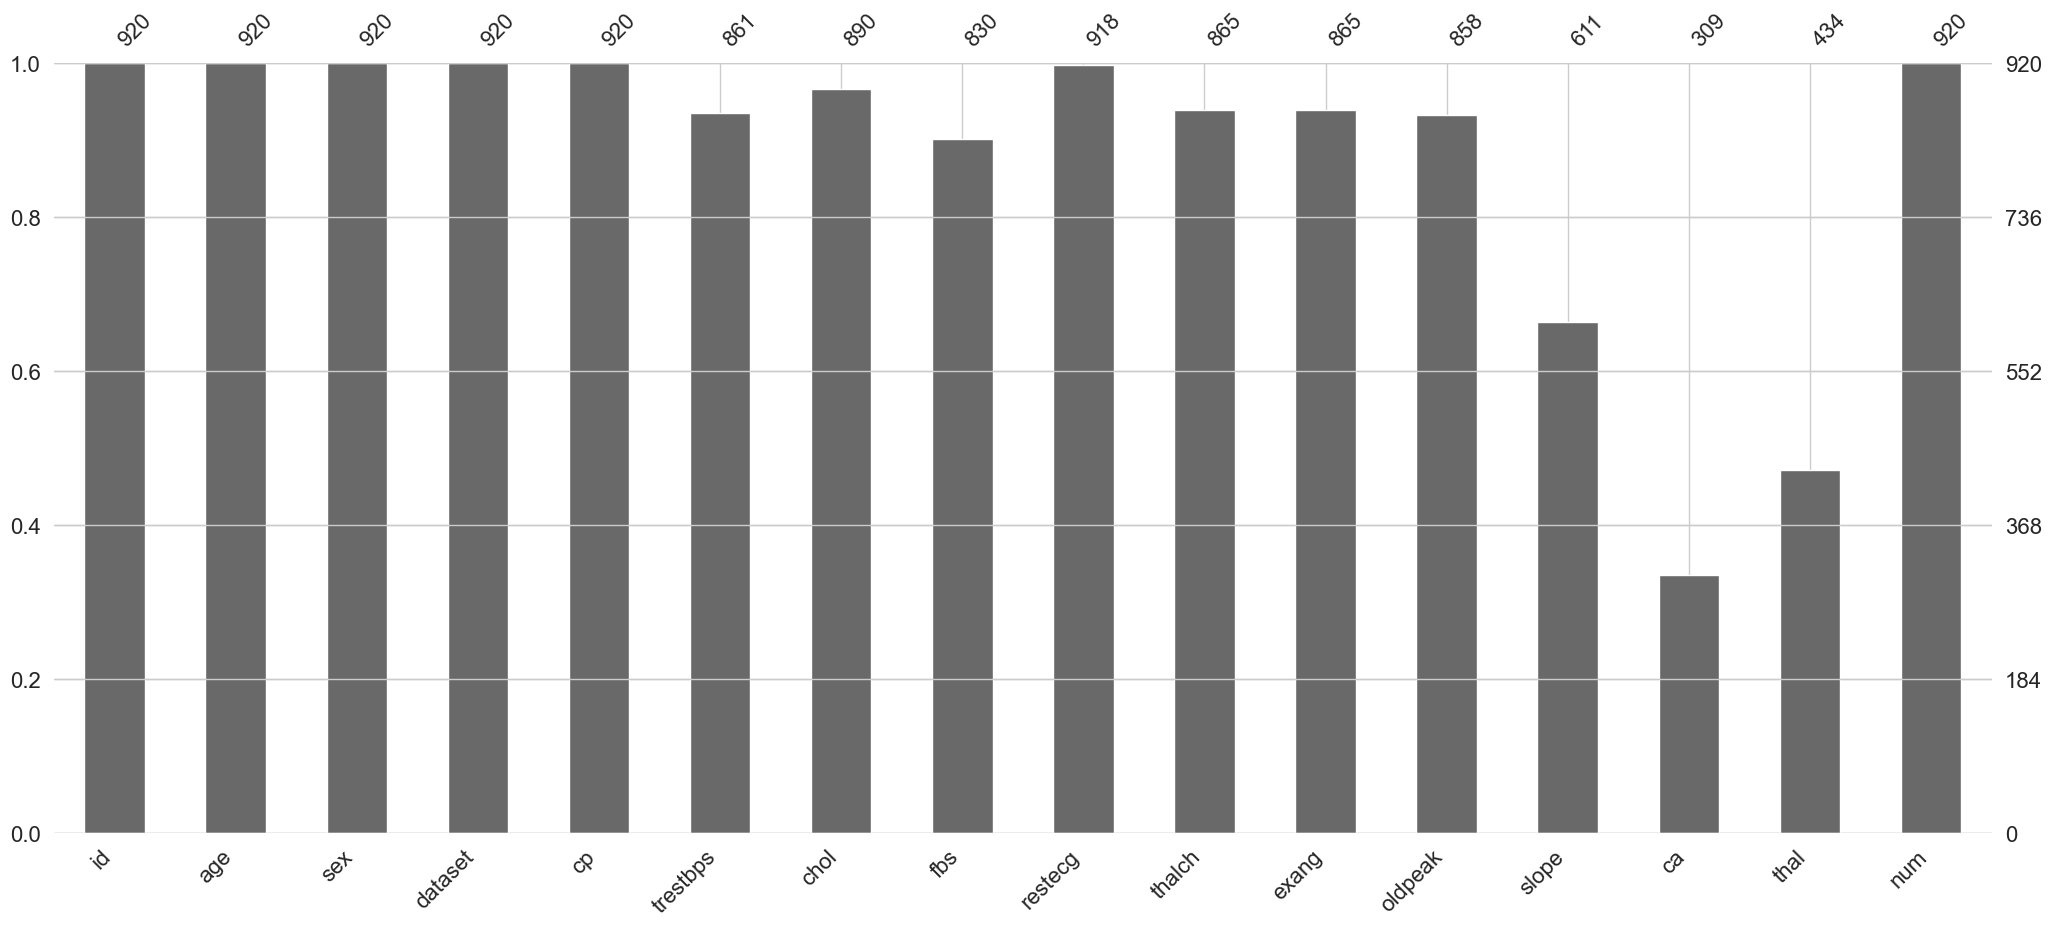

In [135]:
# missingno ile eksik veri bar grafiği
msno.bar(df)          # missingno kütüphanesine yer alan bar grafik ile verinin dağılımını görselleştir
plt.show()            # ekranda gösterme işlemi


**Her bir sütun için eksik oranı yazdıralım.**

In [136]:
# Her sütun için eksik veri oranı (satır sayısına göre)
missing_ratio = df.isnull().sum() / len(df)

# Yalnızca eksik verisi olan sütunları göster
missing_ratio = missing_ratio[missing_ratio > 0]

# Sonuçları yazdır
print(missing_ratio.sort_values(ascending=False))


ca          0.664130
thal        0.528261
slope       0.335870
fbs         0.097826
oldpeak     0.067391
trestbps    0.064130
thalch      0.059783
exang       0.059783
chol        0.032609
restecg     0.002174
dtype: float64


**Yorumlayalım:**

Çıktımıza göre oran dağılımlarını inceleyecek olursak:

- ca        = % 66,41
- thal      = % 52,83
- slope     = % 33,59
- fbs       = % 9,78 
- oldpeak   = % 6,74
- trestbps  = % 6,41
- thalch    = % 5,98
- exang     = % 5,98
- chol      = % 3,26
- restecg   = % 0,22

olarak sütunlarımızda eksik değer oran dağılımlarını görmüş olduk.


**Yorumlayalım:**

**Buradaki oran dağılımlarından yola çıkarak herhangi bir veri silme işlemi olmayacaktır. Eksik veri oranı %75 ve fazlası olsaydı silme işlemi gerçekleştirilirdi. Bu veri setinde doldurma işlemi gerçekleştirilecektir. Eksik verilerin tamamlanması adımına geçelim.**

Eksik verilerin tamamlanması adımında 2 yol bulunmaktadır. Bunlar
- SimpleImputer
- KNNImputer 

Bu veri setinde iki yolda denenmiş ancak değerlerin float'a çevrilmesi gerektiği için eksik verileri doldurma işlemi el ile gerçekleştirilecektir. (Float'a çevirmemin sebebi ileride Gerekli Encoding İşlemleri(LabelEncoder, OneHotEncoder) adımında çevirme işlemi uygulanacaktır. O sebeple el ile doldurma yöntemi tercih edilmiştir.)

**Eksik Verileri Doldurma**

**Sayısal değişkenleri doldururken mean veya mediana göre doldurma işlemleri gerçekleştirilmelidir. Burada Skewness değerinden yardım alarak doldurma işlemi gerçekleştirilecektir.**

**Skewness Değeri:**

**> 0 : Sağa Çarpık**

**< 0 : Sola Çarpık**

**= 0 : Simetik Dağılım**

söz konusudur.

**Verimiz normal dağılım gösterirse mean ile doldurulur. Ancak sağa veya sola çarpık olursa median ile doldurulur.**

In [137]:
# median ile doldurulacak olan sütunları ayrı bir DataFrame olarak ele alalım.

median_df = df[['trestbps', 'chol', 'thalch', 'oldpeak']]

In [138]:
# Sayısal olup eksik değer bulunan sütunları için çarpıklık değerlerini inceleyelim.
for col in median_df:
     print(f"{col} Çarpıklık:", median_df[col].skew())

trestbps Çarpıklık: 0.21333446967212508
chol Çarpıklık: -0.6138360897370758
thalch Çarpıklık: -0.21111858073161133
oldpeak Çarpıklık: 1.0414266146339854


**Yukarıdaki çarpıklık sonuçlarına göre numeric değişkenleri median ile doldurmak daha sağlıklı olacaktır.**

#### Eksik Verileri Doldurma

**Göz Önünde Bulundurulması Gereken Durumlar**

**1. Bu değişkenler kategorik veya yarı-kategorik özellik taşıyor:**

- slope → ST segment eğimi, kategorik (upsloping, flat, downsloping)

- thal → kalp kası kan akışı durumu, kategorik (normal, fixed defect, reversible defect)

- ca → tıkanıklık görülen ana damar sayısı, sayısal gibi görünse de burada tıkanıklık derecesi olarak kullanılıyor ve eksik veri yüksek oranda (611/920) olduğu için ayrı bir kategori oluşturmak anlamlıdır.

**2. Eksik değerlerin yüksek oranda olması:**

- ca'da %66, thal'da %52 ve slope da %33 civarı sütunlarında eksik veri oranı vardır. Bu kadar yüksek eksik veri için ortalama/medyan veya mode ile doldurmak yanıltıcı olabilir.

- Ayrıca bu kadar çok eksik veri varsa, onları ayrı bir kategori olarak işaretlemek modelin bu durumu öğrenmesini sağlar.

**3. Modelin "unknown" durumu öğrenmesi:**

- Eksik veriyi ayrı bir kategori olarak göstermek, modelin eksikliğin kendisinin bir sinyal olabileceğini anlamasına olanak verir.

- Özellikle kalp hastalığı gibi tıbbi verilerde, eksik bilgi bazen önemli olabilir.

In [139]:
# Eksik veri doldurma için sütunlar
median_df = ['trestbps', 'chol', 'thalch', 'oldpeak']  # Sayısallar (ca hariç)
mode_df = ['fbs', 'restecg', 'exang']                  # Kategorikler (unknown olmayan)
unknown_cols = ['thal', 'slope']                       # Unknown olarak doldurulacaklar
ca_cols = ['ca']                                       # -1 = Unknown anlamına gelmektedir.

# Median ile doldurma
for col in median_df:                                  # median_df içerisinde gez
    median_value = df[col].median()                    # her bir column'u medianını bul
    df[col] = df[col].fillna(median_value)             # median değeri ile doldur

# Mode ile doldurma
for col in mode_df:                                    # mode_df içerisinde gez
    mode_value = df[col].mode()[0]                     # her bir column'un en çok tekrar eden değerini bul
    df[col] = df[col].fillna(mode_value)               # mode değeri ile doldur

# Unknown ile doldurma (kategorik sütunlar için)
for col in unknown_cols:                               # unknown_cols' ta gez
    df[col] = df[col].fillna('unknown')                # unknown olarak doldur

# ca sütununu -1 (Unknown) olarak doldurma
for col in ca_cols:                                    # ca_cols'ta gez
    df[col] = df[col].fillna(-1)                       # -1 (unknown) ile doldur anlamına gelmektedir. 

# Veri tiplerini otomatik olarak düzelt (tüm DataFrame için)
df = df.infer_objects(copy=False)

# Kontrol - eksik değerleri kontrol
print(df[median_df + mode_df + unknown_cols].isnull().sum())

trestbps    0
chol        0
thalch      0
oldpeak     0
fbs         0
restecg     0
exang       0
thal        0
slope       0
dtype: int64


**NOT**
- ca = -1 ise (Unknown anlamına gelmektedir.)

**Yukarıdaki sonuçlara göre tüm eksik değerler doldurulmuştur.**

**NOT**

**infer_objects() ne yapar?**

infer_objects() fonksiyonu, object veri tipine sahip sütunları otomatik olarak inceler ve sütunları otomatik olarak doğru veri türüne dönüştürür.

df = df.infer_objects(copy=False)

komutu, özellikle fillna sonrası object hale gelmiş sütunların doğru veri tipine döndürülmesini sağlar ve sonraki analiz adımlarının sağlıklı işlemesini garanti eder.

**df.info() ile tekrardan bu kontrolu sağlayalım.**

- fbs değeri = object tipte iken bool tipe dönüştü.
- exang değeri = object tipte iken bool tipe dönüştü.


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  ca        920 non-null    float64
 14  thal      920 non-null    object 
 15  num       920 non-null    int64  
dtypes: bool(2), float64(5), int64(3), object(6)
memory usage: 102.6+ KB


**Yorumlayalım:**

- fbs değeri = object tipte iken bool tipe dönüştü
- exang değeri = object tipte iken bool tipe dönüştü

**Aykırı Değer Analizi ve İşlenmesi**

**3.1 Aykırı Değer Nedir? Neden Önemlidir?**

**Aykırı değer**, bir dağılımda diğer gözlemlerden **anlamlı biçimde farklı olan veri noktalarıdır.**
Bu değerler:

* **Veri giriş hatası**, ölçüm hatası olabilir.
* Gerçek ama **uç durumları** temsil ediyor olabilir.
* **İstatistikleri bozar** (ortalama, varyans vb.)
* **Model performansını olumsuz etkileyebilir** (özellikle mesafe temelli modellerde)


**3.2 Aykırı Değer Tespit Yöntemleri**

**1.Boxplot ile Aykırı Değer Tespiti**

**2. IQR (Interquartile Range) Yöntemi**

* **IQR = Q3 – Q1**
* Aykırı değer eşiği:

  * Alt sınır: Q1 – 1.5 × IQR
  * Üst sınır: Q3 + 1.5 × IQR


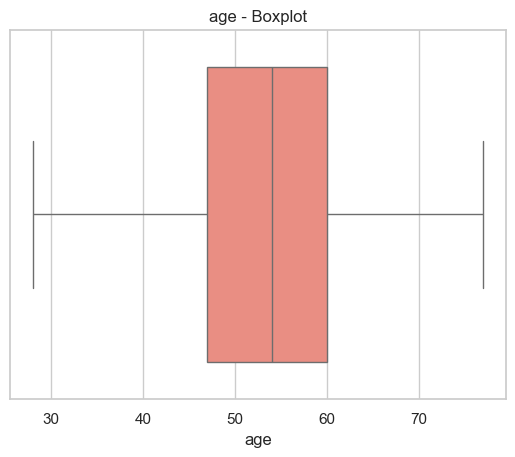

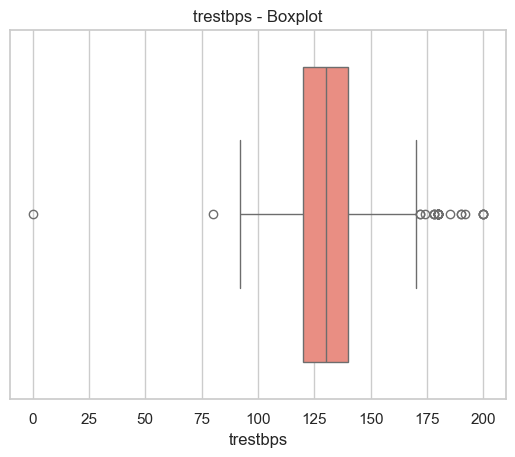

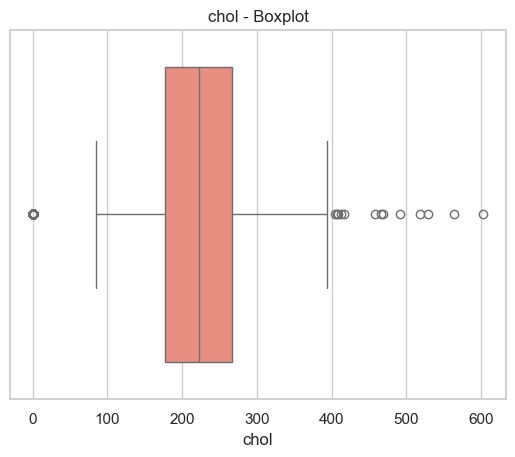

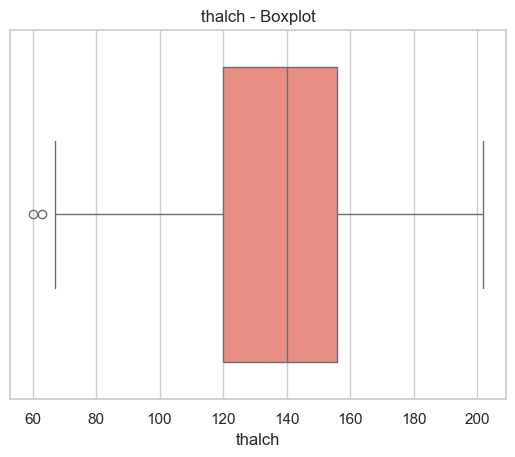

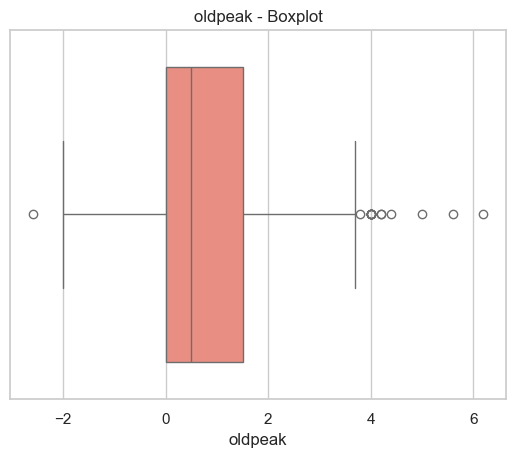

In [141]:
# Aykırı değer için yeni bir df oluşturalım.
outlier_df = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']  # Sayısallar (id(veriden çıkarılacak) ve num(sınırlar anlamsız olur) sütunu dahil edilmedi)

for col in outlier_df:                 # outlier_df içerisinde gez
    sns.boxplot(x=df[col], color="salmon")             # belirlenen sütunların dağılımını ve aykırı değerleri kutu grafiği ile gösterme
    plt.title(f"{col} - Boxplot")
    plt.show()

**Boxplot Yorumlayalım:**
- **age** : Herhangi bir aykırı değere rastlanmamıştır.
- **trestbps** : Değişkeninin çoğunlukla yaklaşık 95 ile 170 arasında dağıldığını söylebiliriz. Ancak, 95'ten az ve 170'ten fazla değerler bulunmaktadır. Bu nedenle bu değerler aykırı değer (outlier) olarak değerlendirilebilir.
- **chol** : Değişkeninin çoğunlukla yaklaşık 90 ile 400 arasında dağıldığını söylebiliriz. Ancak, 400'den fazla ve 0'a yakın daha küçük bir değer diğerlerinden oldukça farklı görünmektedir. Bu sebeple bu değerleri aykırı değer (outlier) kategorisine alabiliriz. Bu tür aykırı değerler, analiz ve modelleme süreçlerinde dikkatle ele alınmalıdır.
- **thalch** : Değişkeninin çoğunlukla yaklaşık 68 ile 200 arasında dağıldığını söylebiliriz. Ancak, 68'den küçük 60'a yakın değerler diğerlerinden oldukça farklı görünmektedir. Bu sebeple aykırı değer (outlier) kategorisine alabiliriz.
- **oldpeak** : Değişkeninin çoğunlukla yaklaşık -2 ile 4'e yakın değerler arasında dağıldığını söylebiliriz. Ancak, 4'den fazla olan değerler ve -2'den küçük bir değer diğerlerinden oldukça farklı görünmektedir. Bu sebeple bu değerleri aykırı değer (outlier) kategorisine alabiliriz. Bu tür aykırı değerler, analiz ve modelleme süreçlerinde dikkatle ele alınmalıdır.

**IQR Yöntemine Göre Aykırı Değerleri Tespit Etme**

In [142]:
# Aykırı değerleri tutmak için bir sözlük
outlier_df = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak'] 

for col in outlier_df:
    Q1 = df[col].quantile(0.25)             # 1.çeyreklik hesapla
    Q3 = df[col].quantile(0.75)             # 3.çeyreklik hesapla
    IQR = Q3 - Q1                           # IQR değerini bulma
    lower_bound = Q1 - 1.5 * IQR            # alt sınır bulalım
    upper_bound = Q3 + 1.5 * IQR            # üst sınır bulalım

    # Aykırı değerleri filtrele
    outlier_values = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Eğer aykırı değer varsa 
    if not outlier_values.empty:
        print(f"{col} sütunundaki aykırı değerler:")  # Aykırı değerlerin bulunduğu sütunun adını yazdırır.
        print(outlier_values[[col]])                  # Belirtilen sütundaki aykırı değerleri görüntüler.
        print("-" * 50)                               # Ekranda daha okunabilir bir yapı oluşturmak için 50 karakterlik bir çizgi çeker.

trestbps sütunundaki aykırı değerler:
     trestbps
14      172.0
83      180.0
126     200.0
172     174.0
183     178.0
188     192.0
201     180.0
213     178.0
231     180.0
338     190.0
375     180.0
387     180.0
475     180.0
484     180.0
548     200.0
569     180.0
595     180.0
644      80.0
647     180.0
680     200.0
700     185.0
701     200.0
727     180.0
753       0.0
779     178.0
854     172.0
889     180.0
896     190.0
--------------------------------------------------
chol sütunundaki aykırı değerler:
      chol
48   417.0
121  407.0
152  564.0
181  409.0
373  412.0
..     ...
818    0.0
819    0.0
822    0.0
839    0.0
840    0.0

[185 rows x 1 columns]
--------------------------------------------------
thalch sütunundaki aykırı değerler:
     thalch
631    60.0
677    63.0
--------------------------------------------------
oldpeak sütunundaki aykırı değerler:
     oldpeak
91       6.2
121      4.0
123      5.6
126      4.0
183      4.2
191      4.2
211      3.8


**IQR Yorumlayalım:**

- trestbps değeri:
    - IQR yöntemiyle 0, 80 ve 172'den büyük değerler aykırı değer olarak belirlenmiştir.
- chol değeri:
    - IQR yöntemiyle 0 değerleri ve 400'den büyük değerler aykırı değer olarak belirlenmiştir.
- thalch değeri:
    - IQR yöntemiyle 60.0 ve 63.0 değerleri aykırı değer olarak belirlenmiştir.
- oldpeak değeri:
    - -2.6 değeri ve 3.8 üzerindeki değerler aykırı değer olarak belirlenmiştir.
    
Yukarıda gösterimine yer verdiğimiz aykırı değerler, analiz sonuçlarımızı etkilememesi adına ya veriden çıkarılacak ya da baskılanacaktır.

**Aykırı Değer İşleme**

3 yöntem bulunmaktadır:

**1.** Silme ile Temizleme

**2.** Winsorizing (Uç değer kırpma)
- Aykırılıkları belirli eşiklere kırpma

**3.** Dönüşüm (Log, sqrt gibi işlemlerle etkisini azaltma)
- Ne zaman uygulanır?
- Pozitif verilerde, Sağa çarpıklık, aykırılık, varyans dengesizliği varsa uygulanır.
- Aykırı değerler arasında çok fark varsa uygulanır.

**Bu veri seti için Winsorizing yöntemi kullanılacaktır.**

**trestbps sütunu için Winsorizing yöntemi**

In [143]:
#  trestbps sütunu için 1.çeyreklik ve 3.çeyreklik değerlerini berirleyelim, IQR hesaplayalım
Q1 = df["trestbps"].quantile(0.25)     
print(Q1)
Q3 = df["trestbps"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

120.0
140.0
20.0


In [144]:
# alt sınır ve üst sınır belirleyelim

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

90.0
170.0


In [145]:
# trestbps için alt sınır ve üst sınırını belirleyelim

outliers_iqr_trestbps = df[(df["trestbps"] < lower_bound) | (df["trestbps"] > upper_bound)]
print(outliers_iqr_trestbps)

      id  age     sex        dataset               cp  trestbps   chol    fbs  \
14    15   52    Male      Cleveland      non-anginal     172.0  199.0   True   
83    84   68    Male      Cleveland      non-anginal     180.0  274.0   True   
126  127   56  Female      Cleveland     asymptomatic     200.0  288.0   True   
172  173   59  Female      Cleveland     asymptomatic     174.0  249.0  False   
183  184   59    Male      Cleveland   typical angina     178.0  270.0  False   
188  189   54    Male      Cleveland  atypical angina     192.0  283.0  False   
201  202   64  Female      Cleveland     asymptomatic     180.0  325.0  False   
213  214   66  Female      Cleveland     asymptomatic     178.0  228.0   True   
231  232   55  Female      Cleveland     asymptomatic     180.0  327.0  False   
338  339   39    Male        Hungary  atypical angina     190.0  241.0  False   
375  376   45  Female        Hungary  atypical angina     180.0  223.0  False   
387  388   46    Male       

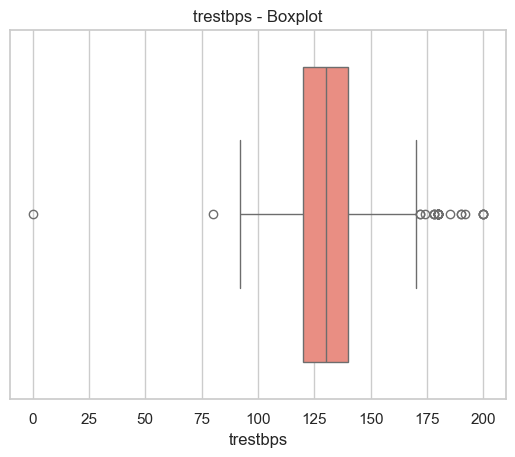

In [146]:
# trestbps sütunu için aykırı değerleri net görmek adına boxplot ile görselleştirelim

sns.boxplot(x=df["trestbps"], color="salmon")
plt.title("trestbps - Boxplot")
plt.show()

In [147]:
# Aykırı değerleri clip işlemini gerçekleştirelim

df["trestbps_wins"] = df["trestbps"].clip(lower=lower_bound, upper=upper_bound)

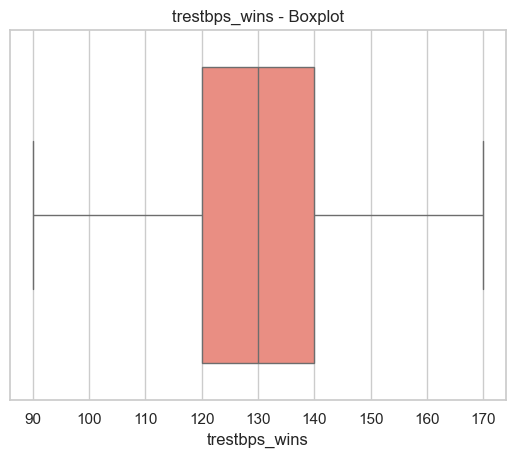

In [148]:
# trestbps sütunu için aykırı değerler clip sonrası boxplot ile görselleştirelim

sns.boxplot(x=df["trestbps_wins"], color="salmon")
plt.title("trestbps_wins - Boxplot")
plt.show()

**chol sütunu için Winsorizing yöntemi**

In [149]:
#  chol sütunu için 1.çeyreklik ve 3.çeyreklik değerlerini berirleyelim, IQR hesaplayalım

Q1 = df["chol"].quantile(0.25)
print(Q1)
Q3 = df["chol"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

print("-------------------------")
# alt sınır ve üst sınır belirleyelim

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

177.75
267.0
89.25
-------------------------
43.875
400.875


In [150]:
# chol için alt sınır ve üst sınırını belirleyelim

outliers_iqr_chol = df[(df["chol"] < lower_bound) | (df["chol"] > upper_bound)]
print(outliers_iqr_chol)

      id  age     sex        dataset            cp  trestbps   chol    fbs  \
48    49   65  Female      Cleveland   non-anginal     140.0  417.0   True   
121  122   63  Female      Cleveland  asymptomatic     150.0  407.0  False   
152  153   67  Female      Cleveland   non-anginal     115.0  564.0  False   
181  182   56  Female      Cleveland  asymptomatic     134.0  409.0  False   
373  374   44    Male        Hungary  asymptomatic     150.0  412.0  False   
..   ...  ...     ...            ...           ...       ...    ...    ...   
818  819   43    Male  VA Long Beach  asymptomatic     122.0    0.0  False   
819  820   63    Male  VA Long Beach   non-anginal     130.0    0.0   True   
822  823   48    Male  VA Long Beach   non-anginal     102.0    0.0  False   
839  840   56    Male  VA Long Beach  asymptomatic     130.0    0.0  False   
840  841   62    Male  VA Long Beach   non-anginal     130.0    0.0   True   

              restecg  thalch  exang  oldpeak        slope   ca

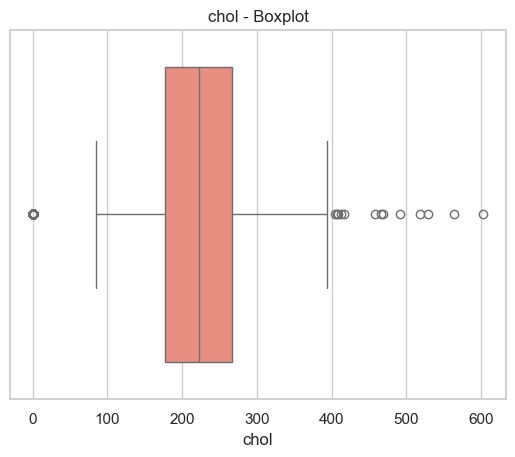

In [151]:
# chol sütunu için aykırı değerleri net görmek adına boxplot ile görselleştirelim

sns.boxplot(x=df["chol"], color="salmon")
plt.title("chol - Boxplot")
plt.show()

In [152]:
# Aykırı değerleri clip işlemini gerçekleştirelim

df["chol_wins"] = df["chol"].clip(lower=lower_bound, upper=upper_bound)

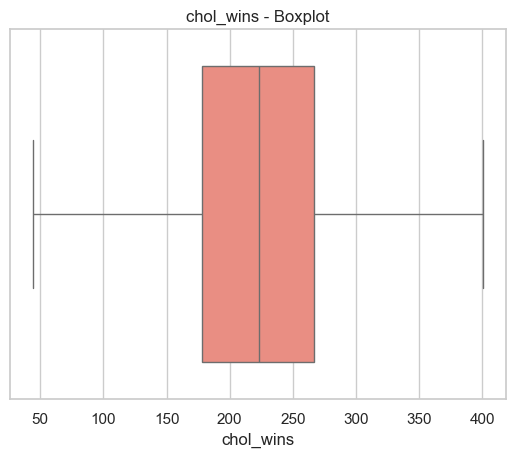

In [153]:
# chol sütunu için aykırı değerler clip sonrası boxplot ile görselleştirelim

sns.boxplot(x=df["chol_wins"], color="salmon")
plt.title("chol_wins - Boxplot")
plt.show()

**thalch sütunu için Winsorizing yöntemi**

In [154]:
#  thalch sütunu için 1.çeyreklik ve 3.çeyreklik değerlerini berirleyelim, IQR hesaplayalım

Q1 = df["thalch"].quantile(0.25)
print(Q1)
Q3 = df["thalch"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

print("-------------------------")

# alt sınır ve üst sınır belirleyelim
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

120.0
156.0
36.0
-------------------------
66.0
210.0


In [155]:
# thalch için alt sınır ve üst sınırını belirleyelim

outliers_iqr_thalch = df[(df["thalch"] < lower_bound) | (df["thalch"] > upper_bound)]
print(outliers_iqr_thalch)

      id  age   sex      dataset            cp  trestbps  chol    fbs restecg  \
631  632   51  Male  Switzerland  asymptomatic     140.0   0.0  False  normal   
677  678   60  Male  Switzerland  asymptomatic     135.0   0.0  False  normal   

     thalch  exang  oldpeak      slope   ca               thal  num  \
631    60.0  False      0.0       flat -1.0             normal    2   
677    63.0   True      0.5  upsloping -1.0  reversable defect    3   

     trestbps_wins  chol_wins  
631          140.0     43.875  
677          135.0     43.875  


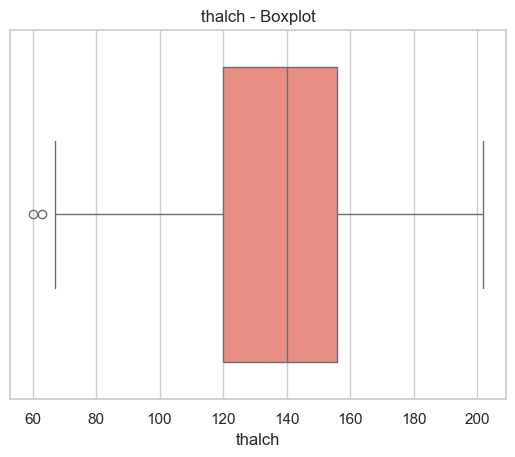

In [156]:
# thalch sütunu için aykırı değerleri net görmek adına boxplot ile görselleştirelim

sns.boxplot(x=df["thalch"], color="salmon")
plt.title("thalch - Boxplot")
plt.show()

In [157]:
# Aykırı değerleri clip işlemini gerçekleştirelim

df["thalch_wins"] = df["thalch"].clip(lower=lower_bound, upper=upper_bound)

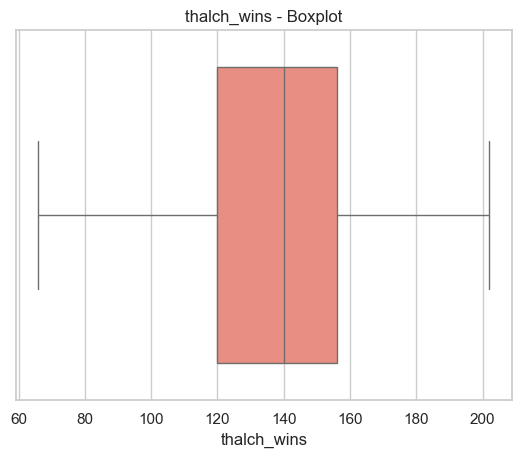

In [158]:
# chol sütunu için aykırı değerler clip sonrası boxplot ile görselleştirelim

sns.boxplot(x=df["thalch_wins"], color="salmon")
plt.title("thalch_wins - Boxplot")
plt.show()

**oldpeak sütunu için Winsorizing yöntemi**

In [159]:
#  oldpeak sütunu için 1.çeyreklik ve 3.çeyreklik değerlerini berirleyelim, IQR hesaplayalım

Q1 = df["oldpeak"].quantile(0.25)
print(Q1)
Q3 = df["oldpeak"].quantile(0.75)
print(Q3)
IQR = Q3 - Q1
print(IQR)

print("-------------------------")

# alt sınır ve üst sınır belirleyelim
lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

0.0
1.5
1.5
-------------------------
-2.25
3.75


In [160]:
# oldpeak için alt sınır ve üst sınırını belirleyelim

outliers_iqr_oldpeak = df[(df["oldpeak"] < lower_bound) | (df["oldpeak"] > upper_bound)]
print(outliers_iqr_oldpeak)

      id  age     sex        dataset              cp  trestbps   chol    fbs  \
91    92   62  Female      Cleveland    asymptomatic     160.0  164.0  False   
121  122   63  Female      Cleveland    asymptomatic     150.0  407.0  False   
123  124   55    Male      Cleveland    asymptomatic     140.0  217.0  False   
126  127   56  Female      Cleveland    asymptomatic     200.0  288.0   True   
183  184   59    Male      Cleveland  typical angina     178.0  270.0  False   
191  192   51    Male      Cleveland    asymptomatic     140.0  298.0  False   
211  212   38    Male      Cleveland  typical angina     120.0  231.0  False   
285  286   58    Male      Cleveland    asymptomatic     114.0  318.0  False   
293  294   63    Male      Cleveland    asymptomatic     140.0  187.0  False   
567  568   52    Male        Hungary    asymptomatic     160.0  246.0  False   
589  590   50    Male        Hungary    asymptomatic     140.0  231.0  False   
615  616   46    Male    Switzerland    

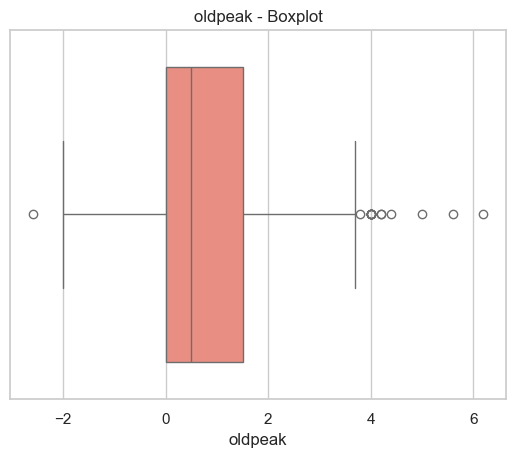

In [161]:
#  oldpeak sütunu için aykırı değerleri net görmek adına boxplot ile görselleştirelim

sns.boxplot(x=df["oldpeak"], color="salmon")
plt.title("oldpeak - Boxplot")
plt.show()

In [162]:
# Aykırı değerleri clip işlemini gerçekleştirelim

df["oldpeak_wins"] = df["oldpeak"].clip(lower=lower_bound, upper=upper_bound)

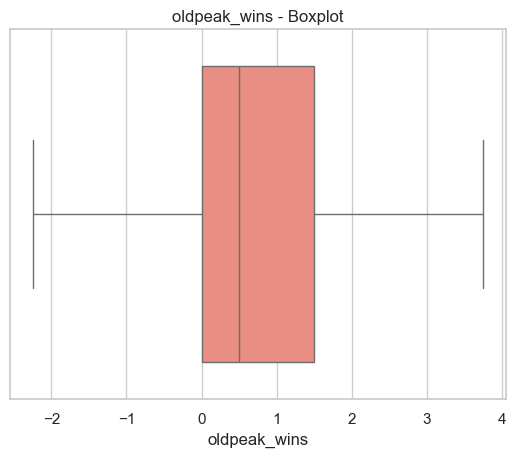

In [163]:
# oldpeak sütunu için aykırı değerler clip sonrası boxplot ile görselleştirelim

sns.boxplot(x=df["oldpeak_wins"], color="salmon")
plt.title("oldpeak_wins - Boxplot")
plt.show()

Böylelikle Winsorizing yöntemiyle birlikte aykırı değerler kırpıldı.

**2.3. Hedef değişkenin dağılımı**

Veri setimizde hedef değişkenimiz "num" değişkenidir.

In [164]:
# Hedef değişkende yer alan değerlerin hepsini inceleyelim

df['num'].value_counts()  

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

**Hedef değişkeni target olarak adlandırıp yeni bir sütun oluşturduk.**

**Kalp hastalığı olanlar = 1,**

**Kalp hastalığı olmayanlar = 0** etiketlenmiştir.

In [165]:
# Hedef değişkende 0 olanları 0, olmayanları 1 olarak değiştiren kodu yazıyoruz

df['target'] = df['num'].apply(lambda x: 0 if x == 0 else 1)

In [166]:
# Tekrardan value_counts() ile değerlerini inceleyelim.

df['target'].value_counts()

target
1    509
0    411
Name: count, dtype: int64

**Hedef değişkenin dağılımını daha net görmek adına pie-chart ve countplot ile dağılımları inceleyelim.**

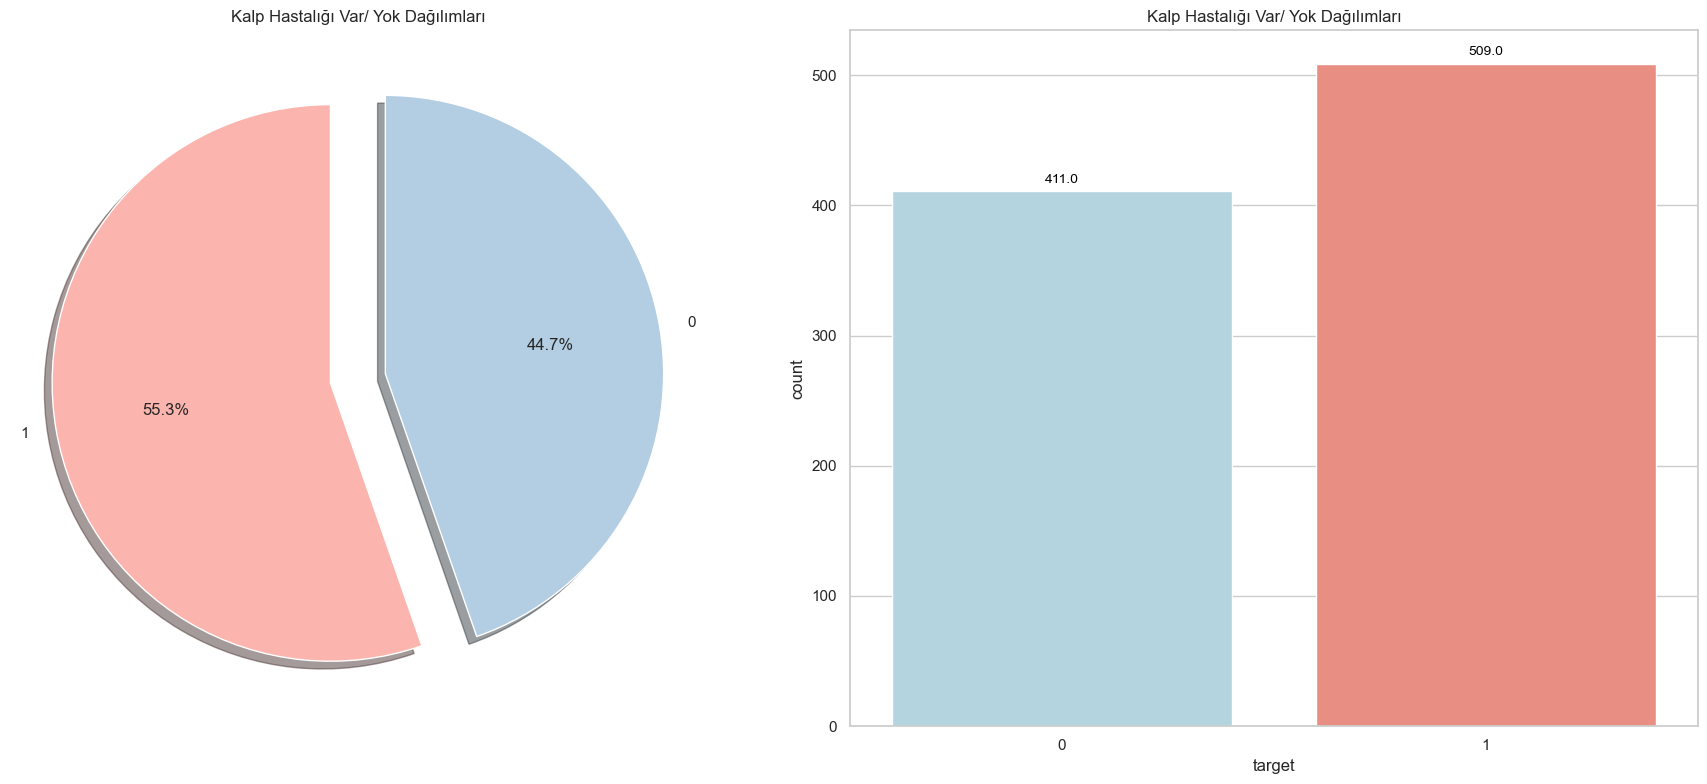

In [167]:
# Grafik alanı oluşturma
fig, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1 satır 2 grafik olacak şekilde figür alanı oluştur

# ----------------- PIE CHART (df['num']) -----------------
# Sınıf sayısına göre explode ve color ayarı
value_counts = df['target'].value_counts()  # 'target' sütunundaki sınıfların frekansını al
explode = [0.1] * len(value_counts)  # Her dilimi biraz dışarı çıkarmak için liste oluştur
colors = plt.cm.Pastel1.colors[:len(value_counts)]  # Pastel renk paletinden uygun sayıda renk seç

# Pasta grafiği (Pie chart)
value_counts.plot.pie(
    explode=explode,               # Dilimleri dışarı çıkart
    autopct='%1.1f%%',             # Yüzdeleri göster
    ax=ax[0],                      # İlk grafik alanına çiz
    shadow=True,                   # Gölge efekti ekle
    startangle=90,                 # Başlangıç açısını belirle
    colors=colors                  # Renkleri uygula
)
ax[0].set_title('Kalp Hastalığı Var/ Yok Dağılımları')  # Başlık ekle
ax[0].set_ylabel('')  # Y ekseni etiketini kaldır

# ----------------- COUNT PLOT (df['y']) -----------------
sns.countplot(x="target", data=df, ax=ax[1], palette=['lightblue', 'salmon'])  # Sayım grafiği oluştur (bar chart)

ax[1].set_title('Kalp Hastalığı Var/ Yok Dağılımları')  # Bar chart başlığı

# Sütunların üzerine sayıları ekleme
for p in ax[1].patches:
    ax[1].annotate(
        f'{p.get_height()}',                                # Sütun yüksekliğini yaz
        (p.get_x() + p.get_width() / 2, p.get_height()),    # Konumu ayarla
        ha='center', va='center', fontsize=10, color='black',  # Yazı hizalama ve stil ayarları
        xytext=(0, 8), textcoords='offset points'           # Yazıyı yukarı kaydır
    )

# Grafiklerin düzenli görünmesi için
plt.tight_layout()  # Grafiklerin üst üste binmesini engelle
plt.show()          # Grafikleri göster

Veri setimiz biraz dengesiz ama fazla değil. 

Eğer ki dengesizlik fazla olsaydı, şu yöntemler uygulanabilirdi:

- Stratified sampling =  Eğitim/test bölme işlemlerinde sınıf oranlarını korur. (train_test_split(..., stratify=y))
- Evaluation metrics =  Sadece accuracy değil; precision, recall, F1-score kullanılabilir.
- SMOTE veya RandomOverSampler =  Eğer ciddi dengesizlik olsaydı veri çoğaltma için bu yöntemler kullanılırdı. Şu an bu veri için gerekli değil.

In [168]:
# Hedef değişkenin istatistiksel dağılımı

df['target'].describe()

count    920.000000
mean       0.553261
std        0.497426
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

**Yorumlayalım:**

- target ikili bir değişken → yalnızca 0 ve 1 değerleri içeriyor.

- Ortalama 0.553, yani: 920 örneğin yaklaşık %55.3’ü sınıf 1, kalan %44.7’si sınıf 0.

- Medyan 1, çünkü sınıf 1 örnekleri sayıca biraz daha fazla.

- Standart sapma (0.497), ikili sınıflarda beklenen düzeyde.

**Hedef değişkenin diğer değişkenler ile ilişkisi**

<Axes: xlabel='sex', ylabel='count'>

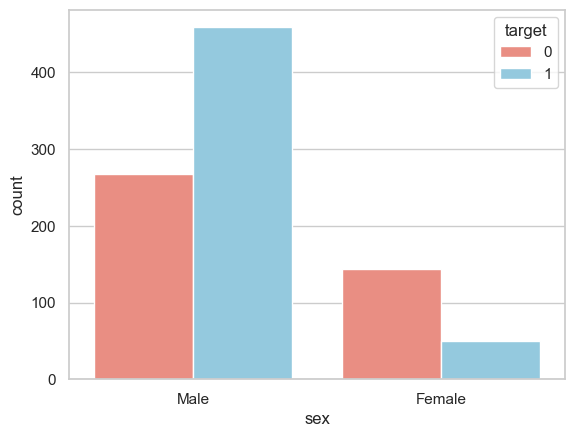

In [169]:
# Cinsiyete göre Var/ Yok Dağılımları

# Seaborn kütüphanesi ile kategorik verilerin frekansını gösteren bar grafik çizilir
sns.countplot(
    x='sex',            # X ekseninde 'sex' sütunu (örneğin: 0 = kadın, 1 = erkek)
    hue='target',       # Barlar, 'target' değişkenine (örneğin: kalp hastalığı var/yok) göre renklendirilir
    data=df,            # Grafik çizimi için kullanılacak veri seti
    palette=['salmon', 'skyblue']  # Renkler: 0 için 'salmon', 1 için 'skyblue'
)

**Grafik yorum:**

Veri setinin çoğunluğunda Erkeklerin sayısı daha ağır basmaktadır. Grafik yorumlarken bu durum göz önüne alınmalıdır.

- Cinsiyeti Erkek olup kalp hastası olan kişilerin sayısı 460'tan fazladır.
- Cinsiyeti Kadın olup kalp hastası olan kişilerin sayısı 50 civarındadır.

Buradan hareketle bu veri setine göre Erkeklerin kalp hastası olma olasılığı kadınlardan daha fazladır.

- Cinsiyeti Erkek olup kalp hastası olmayan kişilerin sayısı 250'den fazladır.
- Cinsiyeti kadın olup kalp hastası olmayan kişilerin sayısı 150 civarındadır.

Buradan hareketle bu veri setine göre Erkeklerin kalp hastası olmama olasılığı kadınlardan daha fazladır.


<Axes: xlabel='cp', ylabel='count'>

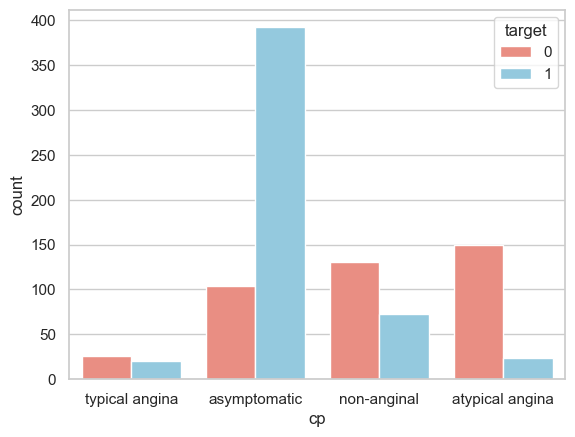

In [170]:
# cp değişkenine göre Var/ Yok Dağılımları

# Seaborn ile 'cp' (göğüs ağrısı tipi) değişkenine göre bar grafik çizilir
sns.countplot(
    x='cp',             # X ekseninde 'cp' sütunu (chest pain type - göğüs ağrısı tipi)
    hue='target',       # Barlar, 'target' değişkenine (kalp hastalığı var/yok) göre renklendirilir
    data=df,            # Grafik çizimi için kullanılacak veri seti
    palette=['salmon', 'skyblue']  # Renkler: 0 için 'salmon', 1 için 'skyblue'
)

**Grafik Yorum:**

- cp(göğüs ağrısı tipi) değeri asymptomatic olan kişilerin çoğunda Kalp Hastalığı olma olasılığı yüksektir. Bu oran en düşük typical angina değerinde görülür.
- cp(göğüs ağrısı tipi) değeri atypical angina olan kişilerde Kalp Hastalığı olmama olasılığı yüksektir. Bu oran yine en düşük typical angina'da görülmektedir. 

<Axes: xlabel='restecg', ylabel='count'>

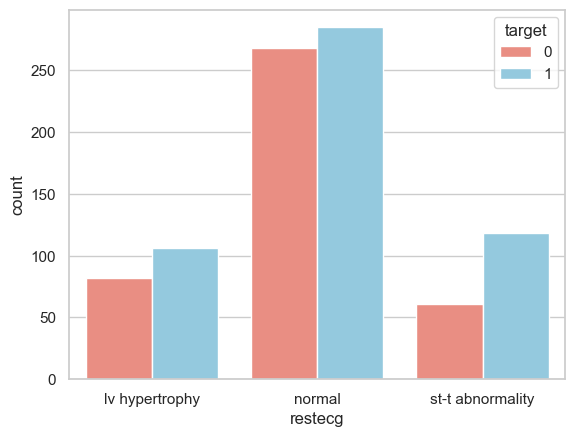

In [171]:
# restecg değişkenine göre Var/ Yok Dağılımları

# Seaborn ile 'restecg' (dinlenme elektrokardiyografik sonuçlar) değişkenine göre bar grafik çizilir
sns.countplot(
    x='restecg',        # X ekseninde 'restecg' sütunu (EKG sonuçları: 0, 1, 2 gibi kategoriler)
    hue='target',       # Barlar, 'target' değişkenine (kalp hastalığı var/yok) göre renklendirilir
    data=df,            # Grafik çizimi için kullanılacak veri seti
    palette=['salmon', 'skyblue']  # Renkler: 0 için 'salmon', 1 için 'skyblue'
)


**Grafik Yorum:**
- restecg (Dinlenme halindeki EKG sonuç) sonuçlarına göre normal restecg oranı Kalp Hastalığı olanlarda yüksek görülmektedir. Ancak Kalp Hastalığı olmayan kişilerde de yüksektir. Yani bu sonucu tek başına değerlendirmek yanıltıcı olabilir. Diğer değişkenleri de göz önünde bulundurmak gerekir.

<Axes: xlabel='slope', ylabel='count'>

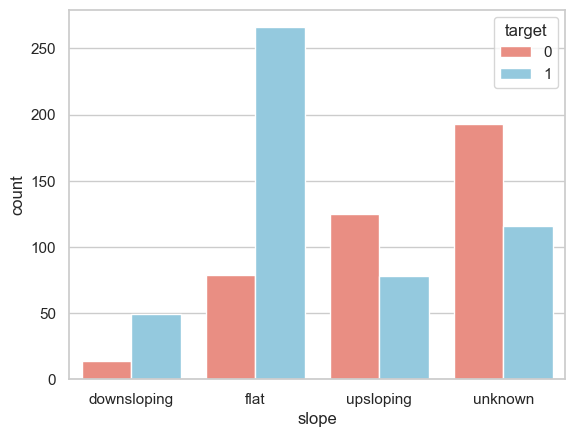

In [172]:
# slope değişkenine göre Var/ Yok Dağılımları

# Seaborn ile 'slope' (egzersiz sırasında ST segmentinin eğimi) değişkenine göre bar grafik çizilir
sns.countplot(
    x='slope',          # X ekseninde 'slope' sütunu (ST segmenti eğimi: 0, 1, 2 gibi kategoriler)
    hue='target',       # Barlar, 'target' değişkenine (kalp hastalığı var/yok) göre renklendirilir
    data=df,            # Grafik çizimi için kullanılacak veri seti
    palette=['salmon', 'skyblue']  # Renkler: 0 için 'salmon', 1 için 'skyblue'
)

**Grafik Yorum:**
- slope (zirve egzersiz ST segmentinin eğimi) flat olan ve Kalp Hastalığı olan kişilerde yüksek oranlara sahip olduğu görülmektedir.

<Axes: xlabel='thal', ylabel='count'>

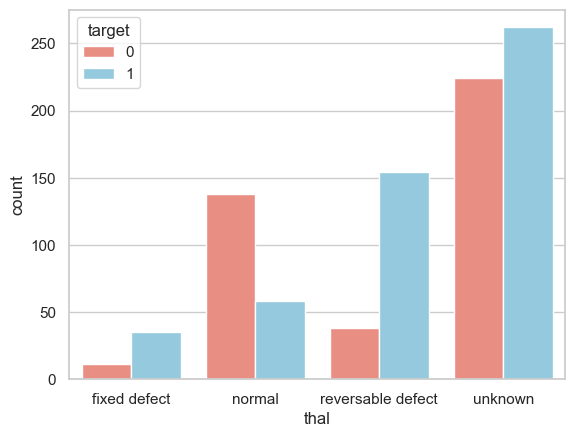

In [173]:
# thal değişkenine göre Var/ Yok Dağılımları

# Seaborn ile 'thal' (talasemi durumu) değişkenine göre bar grafik çizilir
sns.countplot(
    x='thal',           # X ekseninde 'thal' sütunu (thalassemia tipi: 0, 1, 2, 3 gibi kategoriler)
    hue='target',       # Barlar, 'target' değişkenine (kalp hastalığı var/yok) göre renklendirilir
    data=df,            # Grafik çizimi için kullanılacak veri seti
    palette=['salmon', 'skyblue']  # Renkler: 0 için 'salmon', 1 için 'skyblue'
)

**Grafik Yorum:**

-  thal(kalp hastalığına yönelik stres testi sonuç) sonuçları reversable defect olup Kalp Hastlığı olan kişilerde yüksek olduğu görülmektedir.
-  normal değerinde ise Kalp Hastası olmayan kişilerin değerlerinin yüksek olduğu görülmektedir.

In [174]:
# Hedef değişkenin her bir target sınıfı (0 ve 1) için ortalama yaş değerini hesaplayalım.

df.groupby('target')['age'].mean()

target
0    50.547445
1    55.903733
Name: age, dtype: float64

**Yorumlayalım:**

- 0 sınıfından olup kalp hastası olmayanların yaş ortalaması = 50.57
- 1 sınıfından olup kalp hastası olanların yaş ortalaması = 55.90 'dır.

**Diğer adım öncesi benzer olan sütunların veri setinden düşürülmesi gerekmektedir.**

Bu sütunlar : id, dataset, trestbps, chol, thalch, oldpeak, num.

In [175]:
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'trestbps_wins', 'chol_wins', 'thalch_wins', 'oldpeak_wins', 'target'],
      dtype='object')

In [176]:
# Belirtilen sütunları veri setinden düşürme
df = df.drop(['id', 'dataset', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], axis=1)


In [177]:
print("Toplam sütun sayısı:", df.shape[1])

Toplam sütun sayısı: 14


**2.4. En az 3 görsel: Korelasyonlar, dağılımlar veya kategorik etkileşimler**

In [178]:
# Yaş ile maksimum kalp atışı arasındaki ilişki

df['age'].corr(df['thalch_wins'])  

-0.3500972226204725

In [179]:
# Yaş ile kan basıncı arasındaki ilişkiyi bulalım

df['age'].corr(df['trestbps_wins'])

0.24440493103055788

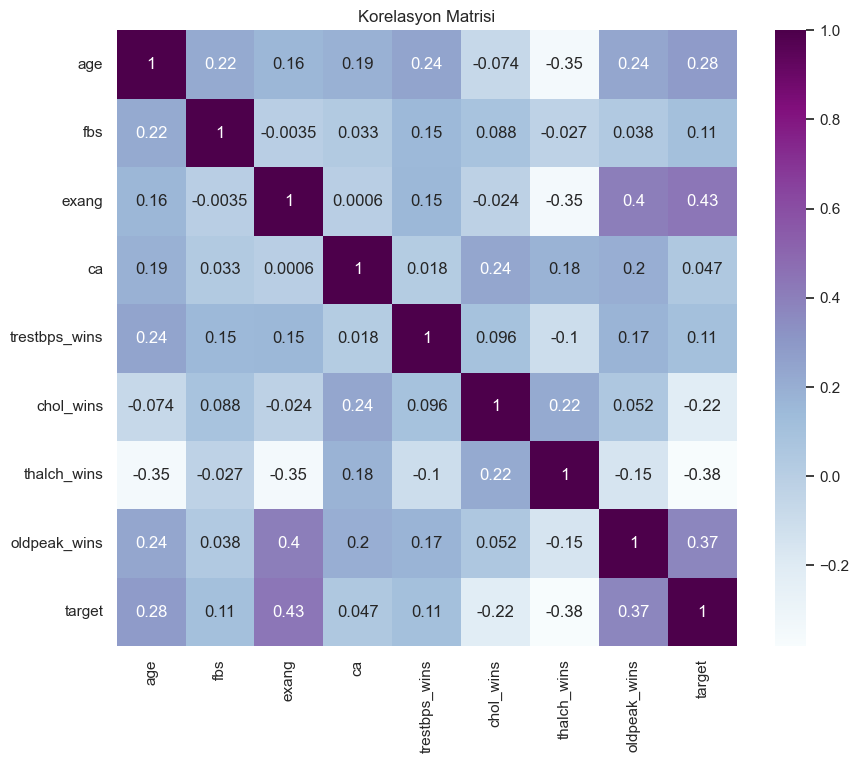

In [180]:
# Korelasyon Isı Haritası (heatmap)

plt.figure(figsize=(10, 8))  # Grafik boyutunu (en x boy) ayarla

sns.heatmap(
    df.corr(numeric_only=True),  # Sayısal sütunlar arasındaki korelasyon matrisini hesapla
    annot=True,                  # Hücrelerin içine korelasyon değerlerini yazdır
    cmap='BuPu'              # Renk paletini 'soğuk-sıcak' olarak ayarla
)

plt.title("Korelasyon Matrisi")  # Grafiğe başlık ekle
plt.show()                      # Grafiği ekranda göster


**Korelasyon Yorumlama:**

- thalch_wins - age / thalch_wins - exang / thalch_wins - target / chol_wins - target /  thalch_wins - oldpeak_wins = aralarında negatif korelasyonlar vardır.
- exang - oldpeak_wins / exang - target  / oldpeak_wins - target = aralarında orta seviye pozitif korelasyonlar vardır.

    - egzersize bağlı gögüs ağrısı(exang) arttıkça, egzersiz sonrası oluşan ST depresyon miktarı(oldpeak) artmaktadır.
    - egzersize bağlı gögüs ağrısı(exang) arttıkça, target yani Kalp Hastalığı değeri artmaktadır.
    - egzersiz sonrası oluşan ST depresyon miktarı(oldpeak) arttıkça, target yani Kalp Hastalığı değeri artmaktadır.

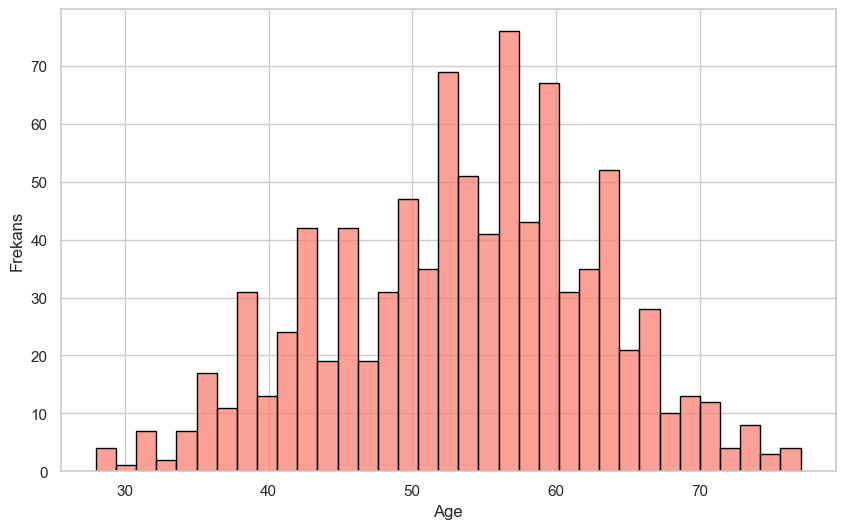

In [181]:
# Yaş dağılımına bakalım.

plt.figure(figsize=(10,6))  # Grafik boyutunu genişlik x yükseklik olarak ayarla

sns.histplot(
    df["age"],               # 'age' sütunundaki verilerin histogramını çiz
    bins=35,                 # Histogramdaki çubuk (bin) sayısı
    color='salmon',          # Çubukların rengi
    edgecolor='black'        # Çubuk kenarlarının rengi
)

plt.xlabel("Age")            # X ekseni etiketi
plt.ylabel("Frekans")        # Y ekseni etiketi
plt.show()                   # Grafiği göster


In [182]:
df["age"].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

**age Dağılımı Hakkında Yorum:**
- Yaş dağılımı yaklaşık 28 ile 77 arasında değişiyor.
- Ortalama ve medyan birbirine oldukça yakın (53.5 ve 54), bu da dağılımın simetrik veya normal dağılıma yakın olduğunu gösteriyor.
- Standart sapma 9.42, yani yaşlar ortalama civarında ama biraz yaygınlık var.
- Çeyrek değerleri (47 ve 60) yaşların çoğunun 40'lı ve 60'lı yaşlar arasında yoğunlaştığını gösteriyor.
- Aşırı uç değer (outlier) yok gibi görünüyor; minimum ve maksimum değerler makul.

**Sonuç:**

Age değişkeni sağa veya sola çok çarpık değil, ortalama ve medyan birbirine yakın, dolayısıyla dağılım büyük ihtimalle normal ya da normal dağılıma yakın bir yapıya sahip.

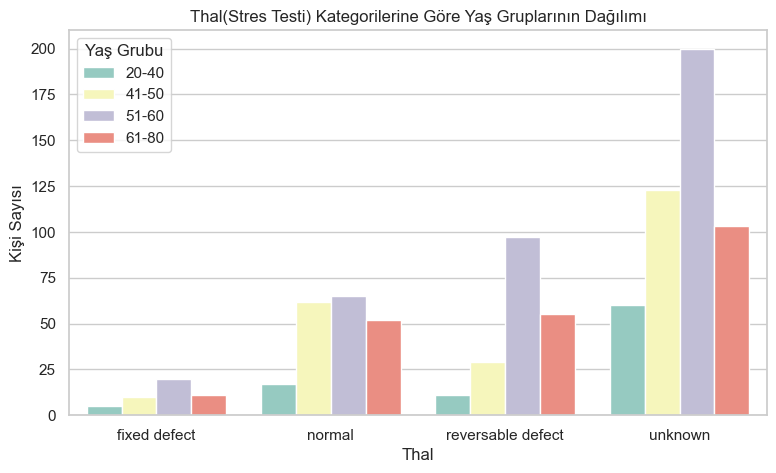

In [183]:
# Yaşı yaş gruplarına bölelim
df['age_group'] = pd.cut(
    df['age'],                         # 'age' sütunundaki sayısal yaş verisi
    bins=[20, 40, 50, 60, 80],        # Yaş aralıklarını belirle
    labels=['20-40', '41-50', '51-60', '61-80']  # Aralıklara isimler ver
)

# Countplot çizimi: thal ve yaş grubu ilişkisi
plt.figure(figsize=(9, 5))            # Grafik boyutunu ayarla
sns.countplot(
    data=df,                         # Veri seti
    x='thal',                       # X ekseninde 'thal' değişkeni
    hue='age_group',                # Barları yaş gruplarına göre renklendir
    palette='Set3'                  # Renk paleti seçimi
)

# Başlık ve eksen etiketleri
plt.title('Thal(Stres Testi) Kategorilerine Göre Yaş Gruplarının Dağılımı')  # Başlık
plt.xlabel('Thal')                  # X ekseni etiketi
plt.ylabel('Kişi Sayısı')           # Y ekseni etiketi

plt.legend(title='Yaş Grubu')       # Legend başlığı
plt.show()                         # Grafik gösterimi


In [184]:
df = df.drop(['age_group'], axis=1)

# Grafik inceleme için oluşturulan grubun silinmesi işlemi gerçekleştirilmiştir.

**Yaş ile Kolestrol Arasındaki İlişkiyi Scatter Plot ile gösterelim.**

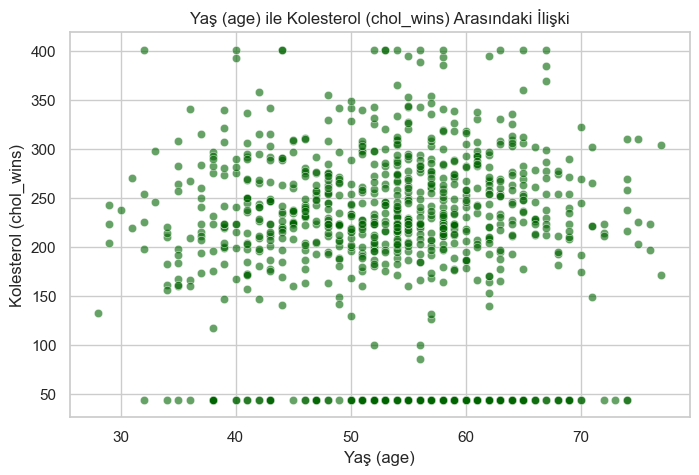

In [185]:
# Stil ayarları
sns.set(style="whitegrid")  # Grafiklerde beyaz ızgara stilini uygula

# Scatter plot çizimi
plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarla
sns.scatterplot(
    data=df,                # Veri seti
    x='age',                # X eksenine yaş değerlerini koy
    y='chol_wins',          # Y eksenine kolesterol değerlerini koy
    color='darkgreen',      # Noktaların rengi
    alpha=0.6               # Noktaların saydamlık seviyesi
)

# Başlık ve eksen etiketleri
plt.title('Yaş (age) ile Kolesterol (chol_wins) Arasındaki İlişki')  # Grafik başlığı
plt.xlabel('Yaş (age)')             # X ekseni etiketi
plt.ylabel('Kolesterol (chol_wins)')  # Y ekseni etiketi

plt.show()                         # Grafik gösterimi

**Yorumlayalım:**

- Veri Dağılımı ve Yoğunluğu:
Yaşlar genellikle 30 ile 75 yaş aralığında yoğunlaşmış.

Kolesterol değerleri ise 150 ile 300 mg/dL arasında yoğun bir şekilde kümelenmiş.

Özellikle 50–60 yaş grubunda veri noktaları oldukça sık.

- Korelasyon (İlişki) Gözlemi:
Noktalar belirli bir eğilim göstermiyor; yani yaş arttıkça kolesterol artıyor ya da azalıyor gibi bir net eğilim yok.

Bu da yaş ile kolesterol düzeyi arasında belirgin bir doğrusal ilişki olmadığını gösteriyor.

Veri oldukça yayılmış ve dağınık.

- Aykırı Değerler (Outliers):
400 mg/dL’ye kadar ulaşan bazı yüksek kolesterol değerleri var → bu değerler hiperkolesterolemi hastalarını gösterebilir.

Ayrıca grafiğin altında, 50 mg/dL gibi olağandışı düşük değerlerde birçok nokta bulunuyor. Bunlar:

Ya eksik verilerin sabit bir değerle doldurulması (örneğin winsorizing sonucu) olabilir,

Ya da veride kodlama hatası ya da ölçüm problemi olabilir.

👉 Bu durum dikkatle incelenmelidir. Gerçek veri mi, yoksa dönüşüm sonucu mu oluşmuş?

📌 Sonuç:
Yaş ile kolesterol arasında güçlü bir ilişki gözlemlenmiyor.

Veri yaygın, doğrusal bir korelasyon zayıf görünüyor.

Alt sınırda (50 mg/dL) çok sayıda değer olması, veri ön işleme adımlarında incelenmesi gereken bir durumdur.

**Yaş ile Kan Basıncı arasındaki ilişkiyi Scatter plot ile gösterelim.**

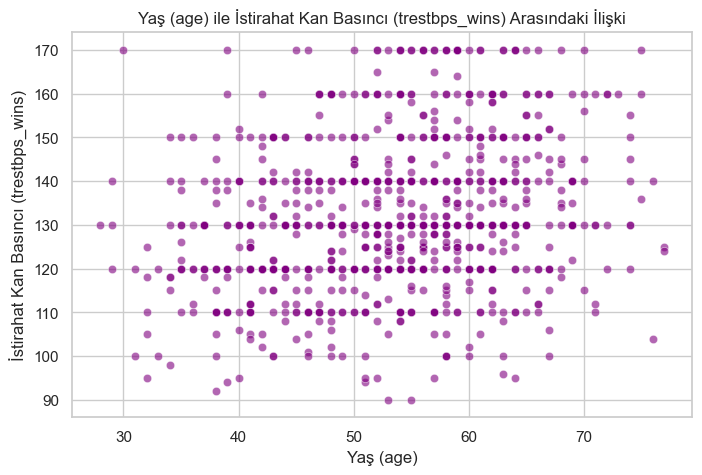

In [186]:
# Stil ayarları
sns.set(style="whitegrid")  # Grafikte beyaz ızgara stilini uygula

# Scatter plot çizimi
plt.figure(figsize=(8, 5))  # Grafik boyutunu ayarla
sns.scatterplot(
    data=df,                # Veri seti
    x='age',                # X eksenine yaş değerlerini koy
    y='trestbps_wins',      # Y eksenine istirahat kan basıncı değerlerini koy
    color='purple',         # Noktaların rengi
    alpha=0.6               # Noktaların saydamlık seviyesi
)

# Başlık ve eksen etiketleri
plt.title('Yaş (age) ile İstirahat Kan Basıncı (trestbps_wins) Arasındaki İlişki')  # Başlık
plt.xlabel('Yaş (age)')                  # X ekseni etiketi
plt.ylabel('İstirahat Kan Basıncı (trestbps_wins)')  # Y ekseni etiketi

plt.show()  # Grafik gösterimi


**Yorumlayalım:**

- Veri Yoğunluğu:

Grafik üzerinde veri noktaları 30–75 yaş aralığında yoğunlaşmıştır.

Trestbps_wins (istirahat kan basıncı) değerleri genellikle 110 ila 150 arasında yoğunlaşmıştır.

- Korelasyon (İlişki) Gözlemi:

Yaş ile istirahat kan basıncı arasında belirgin bir doğrusal ilişki gözlemlenmiyor.

Noktalar oldukça dağınık, bu da düşük korelasyon anlamına gelir.

Özellikle orta yaş grubunda (50–60 yaş), kan basıncı değerleri oldukça değişken.

- Outlier (Aykırı Değerler):

160–170 mmHg civarında birkaç nokta var; bu değerler olası yüksek tansiyon hastalarını temsil ediyor olabilir.

90–100 mmHg altında da birkaç düşük değerli örnek var; bunlar düşük tansiyon (hipotansiyon) olarak değerlendirilebilir.


**Sonuç:**

Yaş arttıkça istirahat kan basıncı artıyor diyemeyiz. Aralarında güçlü bir ilişki bulunmamakta.

Veri oldukça yayılmış; bu da değişkenler arasında zayıf veya yok denecek kadar düşük bir korelasyona işaret eder.

#### **3. Veri Ön İşleme**

- **3.1. Gerekli encoding işlemleri (LabelEncoder, OneHotEncoder)**
- **3.2. Sayısal veriler için gerekirse StandardScaler / MinMaxScaler**
- **3.3. Eğitim/test ayrımı (train_test_split, 70-30 ya da 80-20)**

**3.1. Gerekli encoding işlemleri(LabelEncoder, OneHotEncoder)**

In [187]:
# df'i inceleme yapmak adına tekrar yazdıralım

df

,age,sex,cp,fbs,restecg,exang,slope,ca,thal,trestbps_wins,chol_wins,thalch_wins,oldpeak_wins,target
0,63,Male,typical angina,True,lv hypertrophy,False,downsloping,0.0,fixed defect,145.0,233.0,150.0,2.3,0
1,67,Male,asymptomatic,False,lv hypertrophy,True,flat,3.0,normal,160.0,286.0,108.0,1.5,1
2,67,Male,asymptomatic,False,lv hypertrophy,True,flat,2.0,reversable defect,120.0,229.0,129.0,2.6,1
3,37,Male,non-anginal,False,normal,False,downsloping,0.0,normal,130.0,250.0,187.0,3.5,0
4,41,Female,atypical angina,False,lv hypertrophy,False,upsloping,0.0,normal,130.0,204.0,172.0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,True,st-t abnormality,False,unknown,-1.0,unknown,127.0,333.0,154.0,0.0,1
916,62,Male,typical angina,False,st-t abnormality,False,unknown,-1.0,unknown,130.0,139.0,140.0,0.5,0
917,55,Male,asymptomatic,True,st-t abnormality,False,unknown,-1.0,fixed defect,122.0,223.0,100.0,0.0,1
918,58,Male,asymptomatic,True,lv hypertrophy,False,unknown,-1.0,unknown,130.0,385.0,140.0,0.5,0


In [188]:
# df.info ile inceleme yapmak adına tekrardan bakalım

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            920 non-null    int64  
 1   sex            920 non-null    object 
 2   cp             920 non-null    object 
 3   fbs            920 non-null    bool   
 4   restecg        920 non-null    object 
 5   exang          920 non-null    bool   
 6   slope          920 non-null    object 
 7   ca             920 non-null    float64
 8   thal           920 non-null    object 
 9   trestbps_wins  920 non-null    float64
 10  chol_wins      920 non-null    float64
 11  thalch_wins    920 non-null    float64
 12  oldpeak_wins   920 non-null    float64
 13  target         920 non-null    int64  
dtypes: bool(2), float64(5), int64(2), object(5)
memory usage: 88.2+ KB


**Çevrilme İşlemi Öncesi Sütunların Belirlenmesi**

- Label Encoder Uygulanacak Sütunlar
    - sex
    - fbs
    - exang


- One-Hot Encoding Uygulanacak Sütunlar
    - cp
    - restecg
    - slope
    - thal

- ca, trestbps_wins, , thalch_wins, oldpeak_wins, chol_wins, oldpeak_wins = datatype'larını int64'e çevir

**Label Encoder**

In [189]:
# Gerekli kütüphanelerin yüklenmesi

from sklearn.preprocessing import LabelEncoder

In [190]:
le = LabelEncoder()                  # LabelEncoder nesnesi oluştur

df['sex_label'] = le.fit_transform(df['sex'])    # 'sex' sütununu sayısal değerlere dönüştür ve yeni sütun olarak ekle
df['fbs_label'] = le.fit_transform(df['fbs'])    # 'fbs' sütununu sayısal değerlere dönüştür ve yeni sütun olarak ekle
df['exang_label'] = le.fit_transform(df['exang'])# 'exang' sütununu sayısal değerlere dönüştür ve yeni sütun olarak ekle

**Yorum:**
- sex_label değişkeni için >> Male = 1, Female = 0
- fbs_label değişkeni için >> True = 1, False = 0
- exang_label değişkeni için >> True = 1, False = 0

Görüldüğü üzere, Label Encoder kullanarak gender sütunundaki kategorik değerleri sayısal değerlere dönüştürdük.

**One-Hot Encoder**

In [191]:
# one-hot-encoding yöntemi ile kategorik veriyi sayısala çeviriyoruz. drop_first ile ilk sütunu düşürüyoruz.

df = pd.get_dummies(df, columns=['cp', 'restecg', 'slope', 'thal'], drop_first=True, dtype='int64')

In [192]:
df.head()

,age,sex,fbs,exang,ca,trestbps_wins,chol_wins,thalch_wins,oldpeak_wins,target,...,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality,slope_flat,slope_unknown,slope_upsloping,thal_normal,thal_reversable defect,thal_unknown
0,63,Male,True,False,0.0,145.0,233.0,150.0,2.3,0,...,0,1,0,0,0,0,0,0,0,0
1,67,Male,False,True,3.0,160.0,286.0,108.0,1.5,1,...,0,0,0,0,1,0,0,1,0,0
2,67,Male,False,True,2.0,120.0,229.0,129.0,2.6,1,...,0,0,0,0,1,0,0,0,1,0
3,37,Male,False,False,0.0,130.0,250.0,187.0,3.5,0,...,1,0,1,0,0,0,0,1,0,0
4,41,Female,False,False,0.0,130.0,204.0,172.0,1.4,0,...,0,0,0,0,0,0,1,1,0,0


In [193]:
# Gerekli tip dönüşümlerini yapalım.

float_cols = ['trestbps_wins', 'thalch_wins', 'oldpeak_wins', 'chol_wins', 'ca']  # dtype'ını int64 yapmak istediğimiz sütunlar

df[float_cols] = df[float_cols].astype('int64')          # tiplerini int64 olarak çevirdikç

In [194]:
# Fazla olan sütunları veriden silelim
df = df.drop(['sex', 'fbs', 'exang'], axis=1)


In [195]:
# En son kontrol amaçlı tüm sütunların detaylı bilgilerini getirelim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       920 non-null    int64
 1   ca                        920 non-null    int64
 2   trestbps_wins             920 non-null    int64
 3   chol_wins                 920 non-null    int64
 4   thalch_wins               920 non-null    int64
 5   oldpeak_wins              920 non-null    int64
 6   target                    920 non-null    int64
 7   sex_label                 920 non-null    int32
 8   fbs_label                 920 non-null    int64
 9   exang_label               920 non-null    int64
 10  cp_atypical angina        920 non-null    int64
 11  cp_non-anginal            920 non-null    int64
 12  cp_typical angina         920 non-null    int64
 13  restecg_normal            920 non-null    int64
 14  restecg_st-t abnormality  920 non-null    

**Yorumlayalım:**
- Tüm gerekli dönüşümler yapıldı ve model kurulumu için hazırlıklar tamamlandı.

**3.2. Sayısal veriler için gerekirse StandardScaler / MinMaxScaler**

In [196]:
# Gerekli kütüphaneleri yükleyelim

from sklearn.preprocessing import StandardScaler

In [197]:
df.columns

Index(['age', 'ca', 'trestbps_wins', 'chol_wins', 'thalch_wins',
       'oldpeak_wins', 'target', 'sex_label', 'fbs_label', 'exang_label',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_unknown', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect', 'thal_unknown'],
      dtype='object')

In [198]:
# Sayısal sütunları seçelim, yani hepaisini, hepsinin eksik verisi dolduruldu ancak model ayrımı öncesi en son bu işlemi tekrarlayalım.

df_numeric = df[['age', 'ca', 'trestbps_wins', 'chol_wins', 'thalch_wins',
       'oldpeak_wins', 'target', 'sex_label', 'fbs_label', 'exang_label',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'restecg_normal', 'restecg_st-t abnormality', 'slope_flat',
       'slope_unknown', 'slope_upsloping', 'thal_normal',
       'thal_reversable defect', 'thal_unknown']].dropna()


**3.3. Eğitim/test ayrımı (train_test_split, 70-30 ya da 80-20)**

In [199]:
# Gerekli kütühaneleri yükleyelim

from sklearn.model_selection import train_test_split   # Veri setini eğitim ve test olarak bölmek için
from sklearn.preprocessing import StandardScaler       # Verileri standartlaştırmak (ölçeklendirmek) için gerekli kütüphane

In [200]:
# Bağımlı değişken (hedef değişken)
y = df["target"]           # Tahmin etmek istediğimiz değişken

# Bağımsız değişkenler (özellikler)
X = df.drop(columns="target")  # 'target' sütunu dışındaki tüm sütunlar özellik olarak seçilir

In [201]:
# Eğitim/test verilerini ayırma

X_train, X_test, y_train, y_test = train_test_split(
    X, y,                     # Özellikler ve hedef değişken
    train_size=0.70,          # %70 eğitim, %30 test verisi olacak şekilde böl
    random_state=42           # Sonuçların tekrarlanabilir olması için sabit rastgelelik
)

# StandardScaler ile veriyi ölçeklendirme (standardizasyon)
scaler = StandardScaler()          # StandardScaler nesnesi oluştur

X_train_std = scaler.fit_transform(X_train)  # Eğitim verisini öğren ve dönüştür
X_test_std = scaler.transform(X_test)        # Test verisini aynı dönüşümle dönüştür (fit etmiyoruz!)

#### **4. Eğer Heart Disease UCI seçildiyse (Sınıflandırma):**

- **4.1. Hedef değişken: target (1 = kalp hastalığı var, 0 = yok)**
- **4.2. En az iki sınıflandırma modeli kurun:**
- **4.3. Logistic Regression**
- **4.4. Random Forest veya KNN/SVM gibi alternatif model**
- **4.5. Başarı metrikleri:**
- **4.6. Accuracy, Precision, Recall, F1-Score**
- **4.7. Confusion Matrix**
- **4.8. ROC-AUC eğrisi**

**4.1. Hedef değişken: target (1 = kalp hastalığı var, 0 = yok)**

Hedef değişken model kurulumu öncesi 1 ve 0 ayrımı yapılmıştır.

**4.2. En az iki sınıflandırma modeli kurun:**

**Seçilen Sınıflandırma Modelleri**

- Logistic Regresyon
- Random Forest
- KNN (K-Nearst Neighbors)

bu modeller üzerinden model kurulacak olup sonuçların karşılaştırılması gerçekleştirilecektir.

**4.3. Logistic Regression**

In [202]:
# Logistic Regression modelini içe aktaralım

from sklearn.linear_model import LogisticRegression  # Lojistik regresyon sınıflandırma modeli için

In [203]:
# Modeli eğitiyoruz (öğrenme tamamlanacak)

log_model = LogisticRegression(
    max_iter=1000,           # Maksimum iterasyon sayısı (modelin öğrenme için izin verilen adım sayısı)
    class_weight='balanced'  # Dengesiz sınıflar için ağırlıklandırma yapar
)

log_model.fit(X_train_std, y_train)  # Modeli eğitim verisi ile eğit

LogisticRegression(class_weight='balanced', max_iter=1000)

In [204]:
# Test verisi üzerinde tahmin yapıyoruz (PREDICT : tahmin etmek)

y_pred = log_model.predict(X_test_std)  # Eğitilmiş model ile test verisinin sınıfını tahmin et

In [205]:
# Performans ölçüm metriklerini içe aktaralım

from sklearn.metrics import confusion_matrix, classification_report  

# confusion_matrix: Tahminlerin gerçek değerlerle karşılaştırıldığı matris
# classification_report: Doğruluk, precision, recall, f1-score gibi detaylı performans raporu

In [206]:
# Detaylı Rapor ve Karışıklık Matrisi : Karışıklık matrisi ve tüm metriklerin özet raporu:

karisiklik_matrisi_log = confusion_matrix(y_test, y_pred)     # Gerçek ve tahmin edilen değerlerle karışıklık matrisini oluştur
siniflandirma_raporu_log = classification_report(y_test, y_pred)  # Precision, recall, f1-score gibi metrikleri içeren raporu oluştur

print("Logistic Reg. Karışıklık Matrisi:\n", karisiklik_matrisi_log)  # Karışıklık matrisini yazdır
print()
print("Logistic Reg. Sınıflandırma Raporu:\n", siniflandirma_raporu_log)  # Detaylı sınıflandırma raporunu yazdır

Logistic Reg. Karışıklık Matrisi:
 [[ 96  24]
 [ 31 125]]

Logistic Reg. Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       120
           1       0.84      0.80      0.82       156

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



**4.4. Random Forest veya KNN/SVM gibi alternatif model**

**Random Forest**

In [207]:
# Random Forest sınıflandırma modeli için gerekli sınıfı içe aktaralım

from sklearn.ensemble import RandomForestClassifier

In [208]:
# Bağımlı değişken (hedef)
y_rand = df["target"]          # Tahmin edilmek istenen değişken

# Bağımsız değişkenler (özellikler)
X_rand = df.drop(columns="target")  # 'target' dışındaki tüm sütunlar özellik olarak alınır

In [209]:
# Eğitim-test verilerini ayırma işlemi

X_train_rand, X_test_rand, y_train_rand, y_test_rand = train_test_split(
    X_rand, y_rand,               # Özellikler ve hedef değişken
    train_size=0.70,              # %70 eğitim, %30 test olarak ayır
    random_state=42,              # Sonuçların tekrarlanabilir olması için sabit rastgelelik
    stratify=y                    # Hedef değişkenin sınıf dağılımını koru (denge için)
)

In [210]:
# Verileri ölçeklendirme işlemi (standardizasyon)

scaler = StandardScaler()                     # StandardScaler nesnesi oluştur

X_train_rand_scaled = scaler.fit_transform(X_train_rand)  # Eğitim verisini öğrenip dönüştür
X_test_rand_scaled = scaler.transform(X_test_rand)        # Test verisini aynı dönüşümle dönüştür

In [211]:
# Random Forest modelini oluşturma
rf_model = RandomForestClassifier(
    n_estimators=200,           # Oluşturulacak ağaç sayısı (200 adet ağaç)
    max_depth=5,                # Her ağacın maksimum derinliği (5 ile sınırlı)
    min_samples_split=10,       # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı (10)
    min_samples_leaf=4,         # Yaprak düğümde olması gereken minimum örnek sayısı (4)
    max_features='sqrt',        # Her düğümde rastgele seçilen özellik sayısı (kök özellik sayısı)
    random_state=42             # Rastgelelik için sabit tohum, sonuçların tekrarlanabilir olması için
)

In [212]:
# Random Forest modelini eğitim verisi ile eğitiyoruz

rf_model.fit(X_train_rand_scaled, y_train_rand)  # Modeli özellikler ve hedef değişken ile öğren

RandomForestClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200, random_state=42)

In [213]:
# Test verisi üzerinde tahmin yapıyoruz (PREDICT : tahmin etmek)

y_pred_rand = rf_model.predict(X_test_rand_scaled)  # Eğitilmiş Random Forest modeli ile test verisinin sınıfını tahmin et

In [214]:
# Detaylı Rapor ve Karışıklık Matrisi : Karışıklık matrisi ve tüm metriklerin özet raporu

karisiklik_matrisi_log = confusion_matrix(y_test_rand, y_pred_rand)         # Gerçek ve tahmin edilen değerlerle karışıklık matrisini oluştur
siniflandirma_raporu_log = classification_report(y_test_rand, y_pred_rand)  # Precision, recall, f1-score gibi metrikleri içeren raporu oluştur

print("Random Forest Karışıklık Matrisi:\n", karisiklik_matrisi_log)         # Karışıklık matrisini yazdır
print()
print("Random Forest Sınıflandırma Raporu:\n", siniflandirma_raporu_log)    # Detaylı sınıflandırma raporunu yazdır

Random Forest Karışıklık Matrisi:
 [[ 97  26]
 [ 22 131]]

Random Forest Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.83      0.86      0.85       153

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



**KNN(K-Nearest Neighbors)**

In [215]:
# K-Nearest Neighbors sınıflandırma modeli için gerekli sınıfı içe aktaralım

from sklearn.neighbors import KNeighborsClassifier

In [216]:
# Bağımlı değişken (hedef)
y_knn = df["target"]           # Tahmin edilecek değişken

# Bağımsız değişkenler (özellikler)
X_knn = df.drop("target", axis=1)  # 'target' dışındaki tüm sütunlar özellik olarak alınır

In [217]:
# Veriyi eğitim ve test setlerine ayırma işlemi

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn,               # Özellikler ve hedef değişken
    train_size=0.70,            # %70 eğitim, %30 test olacak şekilde böl
    random_state=42             # Sonuçların tekrarlanabilir olması için sabit rastgelelik
)

In [218]:
# Verileri standartlaştırma (ölçeklendirme) işlemi

scaler = StandardScaler()                       # StandardScaler nesnesi oluştur

X_train_scaled_knn = scaler.fit_transform(X_train_knn)   # Eğitim verisini öğrenip dönüştür
X_test_scaled_knn = scaler.transform(X_test_knn)         # Test verisini aynı dönüşümle dönüştür

En iyi k değerinden önce normal bir knn model kuralım.

In [219]:
# KNN modelini oluşturalım (komşu sayısı 3)

knn_1 = KNeighborsClassifier(n_neighbors=3)   # 3 en yakın komşuyu kullanarak sınıflandırma yapacak model

In [220]:
# Modeli eğitim verisi ile eğitiyoruz (öğrenme tamamlanacak)

knn_1.fit(X_train_scaled_knn, y_train_knn)  # Modeli özellikler ve hedef değişken ile öğren

KNeighborsClassifier(n_neighbors=3)

In [221]:
# Test verisi üzerinde tahmin yapıyoruz (PREDICT : tahmin etmek)

y_pred_knn_final = knn_1.predict(X_test_scaled_knn)  # Eğitilmiş KNN modeli ile test verisinin sınıfını tahmin et

In [222]:
# Eğitilen modelin performansını hızlıca değerlendirelim

print("\nSınıflandırma Raporu:\n", classification_report(y_test_knn, y_pred_knn_final))  
# Sınıflandırma raporunu yazdır (precision, recall, f1-score vb.)

holdout = classification_report(y_test_knn, y_pred_knn_final)  
# Raporu değişkene atayarak ileride kullanmak üzere sakla


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78       120
           1       0.84      0.81      0.82       156

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.81      0.80      0.80       276



Modelimizin en iyi k değerini bulabilmesi için **Cross Validation** kullanalım ve en iyi k değerini bulalım.

In [223]:
# Cross validation (çapraz doğrulama) için gerekli fonksiyonu içe aktaralım

from sklearn.model_selection import cross_validate

In [224]:
# En iyi k değerini bulmak için çapraz doğrulama

k_values = np.arange(1, 21)      # 1'den 20'ye kadar k değerleri (komşu sayısı)
mean_test_score = []             # Her k için ortalama doğruluk skorlarını saklamak için liste

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)      # k komşulu KNN modeli oluştur
    cv_results = cross_validate(
        knn, 
        X_train_scaled_knn, 
        y_train_knn, 
        cv=5,                   # 5 katlı çapraz doğrulama
        scoring="accuracy"      # Değerlendirme metriği olarak doğruluk (accuracy)
    )
    mean_test_score.append(cv_results["test_score"].mean())  # Ortalama test skorunu listeye ekle

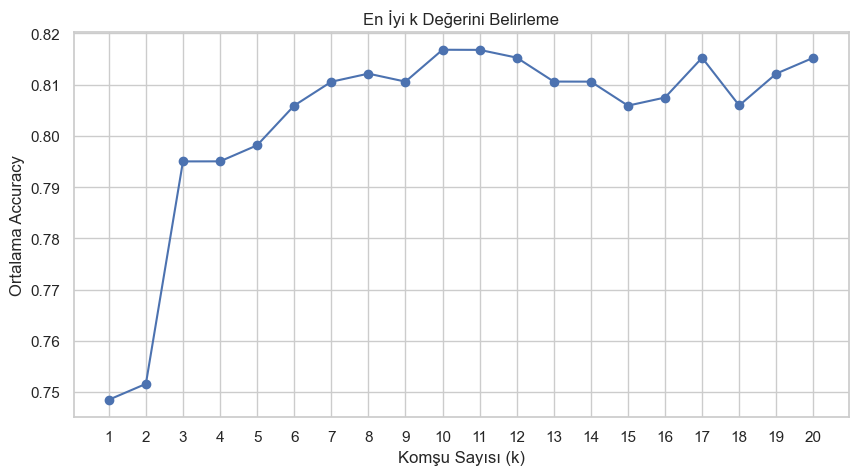

In [225]:
# En iyi k değerini görselleştirme

plt.figure(figsize=(10, 5))               # Grafik boyutunu ayarla
plt.plot(k_values, mean_test_score, marker="o")  # k değerlerine göre ortalama doğruluk skorlarını çiz, noktalarla işaretle
plt.xlabel("Komşu Sayısı (k)")            # X ekseni etiketi
plt.ylabel("Ortalama Accuracy")            # Y ekseni etiketi
plt.title("En İyi k Değerini Belirleme")   # Grafik başlığı
plt.grid(True)                            # Izgara çizgilerini aç
plt.xticks(k_values)                      # X eksenindeki işaretleri k değerlerine göre ayarla
plt.show()                               # Grafiği göster

**En iyi k değeriyle final model oluşturalım.**

In [226]:
# En iyi k değerini bul ve final modeli oluştur

best_k = k_values[np.argmax(mean_test_score)]   # En yüksek ortalama doğruluk değerine sahip k'yı seç
print("En iyi k değeri:", best_k)               # En iyi k değerini yazdır

knn_final = KNeighborsClassifier(
    n_neighbors=best_k, 
    weights='uniform'                            # Komşulara eşit ağırlık ver
)

knn_final.fit(X_train_scaled_knn, y_train_knn)  # Final modeli eğitim verisi ile eğit

En iyi k değeri: 10


KNeighborsClassifier(n_neighbors=10)

In [227]:
# Test verisi üzerinde tahmin yapıyoruz (PREDICT : tahmin etmek)

y_pred_knn_final1 = knn_final.predict(X_test_scaled_knn)  # Final KNN modeli ile test verisinin sınıfını tahmin et

In [228]:
# Final modelin performansını değerlendirelim

print("\nSınıflandırma Raporu:\n", classification_report(y_test_knn, y_pred_knn_final1))  
# Precision, recall, f1-score gibi metrikleri yazdır

holdout = classification_report(y_test_knn, y_pred_knn_final1)  
# Performans raporunu değişkene atayarak ileride kullanmak üzere sakla


Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       120
           1       0.87      0.77      0.82       156

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.81       276



**4.5. Başarı metrikleri:**

Bu veri seti Sınıflandırma veri seti olduğu için kullanılacak Temel Metriklerimiz şunlardır:

- Accuracy: Doğru tahminlerin toplam tahmin sayısına oranı.
- Precision: Modelin pozitif sınıf tahminlerinin ne kadarının doğru olduğunu gösterir.
    - Önemli: Yanlış pozitifler fazlaysa kullanılır.
- Recall: Gerçek pozitiflerin ne kadarını yakaladığını ölçer.
    - Önemli: Pozitifleri kaçırmak istenmiyorsa (hastalık, dolandırıcılık gibi).
- F1 Score: Precision ve recall’un harmonik ortalaması. Dengeli başarı için idealdir.
- Confusion Matrix: TP, FP, FN, TN değerlerini tablo halinde gösterir.

**4.6. Accuracy, Precision, Recall, F1-Score**

**4.7. Confusion Matrix**

**4.8. ROC-AUC eğrisi**

**Logistic Regression**

In [229]:
# Performans metriklerini içe aktaralım

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# accuracy_score: Doğruluk oranı
# precision_score: Kesinlik
# recall_score: Duyarlılık
# f1_score: Kesinlik ve duyarlılığın harmonik ortalaması

In [230]:
# -------------------------------
# LOGISTIC REGRESSION TEST SETİ TAHMİNİ VE METRİKLER
# -------------------------------

y_pred = log_model.predict(X_test_std)  # Test verisi üzerinde tahmin yap

accuracy = accuracy_score(y_test, y_pred)    # Doğruluk oranını hesapla
precision = precision_score(y_test, y_pred)  # Kesinlik skorunu hesapla
recall = recall_score(y_test, y_pred)        # Duyarlılık skorunu hesapla
f1 = f1_score(y_test, y_pred)                 # F1 skorunu hesapla (precision ve recall dengesi)

print("\nLOGISTIC REGRESSION TEST SETİ PERFORMANSI")
print(f"Logistic Test Accuracy:  {accuracy:.2f}")    # Doğruluk oranını yazdır
print(f"Logistic Test Precision: {precision:.2f}")   # Kesinlik skorunu yazdır
print(f"Logistic Test Recall:    {recall:.2f}")      # Duyarlılık skorunu yazdır
print(f"Logistic Test F1 Score:  {f1:.2f}")          # F1 skorunu yazdır


LOGISTIC REGRESSION TEST SETİ PERFORMANSI
Logistic Test Accuracy:  0.80
Logistic Test Precision: 0.84
Logistic Test Recall:    0.80
Logistic Test F1 Score:  0.82


In [231]:
# -------------------------------------
# LOGISTIC REGRESSION OVERFITTING KONTROLÜ (Eğitim Verisi)
# -------------------------------------

y_train_pred = log_model.predict(X_train_std)  # Eğitim verisi üzerinde tahmin yap

train_accuracy = accuracy_score(y_train, y_train_pred)    # Eğitim seti doğruluğu
train_precision = precision_score(y_train, y_train_pred)  # Eğitim seti kesinliği
train_recall = recall_score(y_train, y_train_pred)        # Eğitim seti duyarlılığı
train_f1 = f1_score(y_train, y_train_pred)                 # Eğitim seti F1 skoru

print("\nLOGISTIC REGRESSION EĞİTİM SETİ PERFORMANSI (Overfitting Kontrolü)")
print(f"Logistic Train Accuracy : {train_accuracy:.2f}")    # Eğitim doğruluğunu yazdır
print(f"Logistic Train Precision: {train_precision:.2f}")  # Eğitim kesinliğini yazdır
print(f"Logistic Train Recall   : {train_recall:.2f}")     # Eğitim duyarlılığını yazdır
print(f"Logistic Train F1 Score : {train_f1:.2f}")          # Eğitim F1 skorunu yazdır


LOGISTIC REGRESSION EĞİTİM SETİ PERFORMANSI (Overfitting Kontrolü)
Logistic Train Accuracy : 0.83
Logistic Train Precision: 0.85
Logistic Train Recall   : 0.85
Logistic Train F1 Score : 0.85



Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       120
           1       0.84      0.80      0.82       156

    accuracy                           0.80       276
   macro avg       0.80      0.80      0.80       276
weighted avg       0.80      0.80      0.80       276



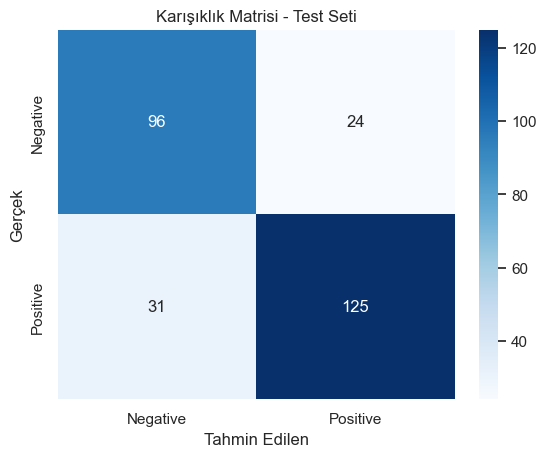

In [232]:
# Logistic Regression Karışıklık Matrisi (Heatmap)

conf_matrix = confusion_matrix(y_test, y_pred)  # Test sonuçları için karışıklık matrisi oluştur
print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred))  # Detaylı sınıflandırma raporunu yazdır

sns.heatmap(
    conf_matrix, 
    annot=True,             # Matris hücrelerine sayıları yazdır
    fmt='d',               # Sayıları tam sayı formatında göster
    cmap='Blues',          # Mavi renk skalası kullan
    xticklabels=['Negative', 'Positive'],  # X ekseni etiketleri
    yticklabels=['Negative', 'Positive']   # Y ekseni etiketleri
)

plt.xlabel('Tahmin Edilen')   # X ekseni başlığı
plt.ylabel('Gerçek')          # Y ekseni başlığı
plt.title('Karışıklık Matrisi - Test Seti')  # Grafik başlığı
plt.show()                    # Grafiği göster

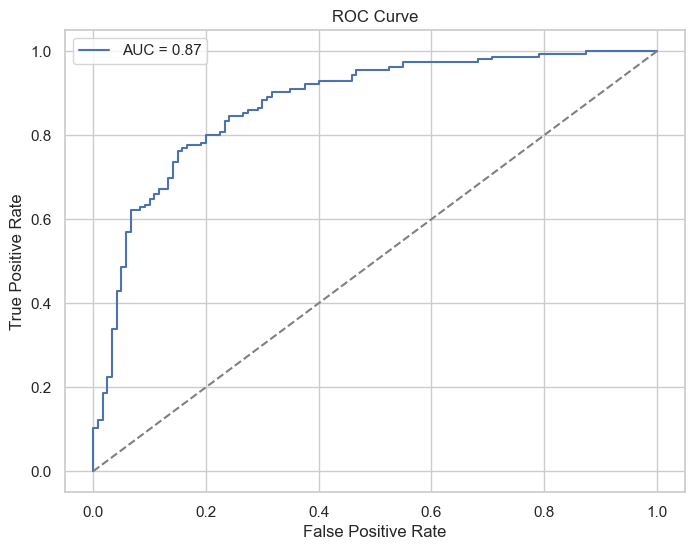

In [233]:
# Logistic Regression ROC Eğrisi ve AUC Skoru - AUC Skoru: 1’e ne kadar yakınsa, model o kadar iyi sınıflandırma yapıyor demektir.
# ROC Eğrisi: Modelin farklı eşiklerdeki ayırt etme gücünü gösterir.

from sklearn.metrics import roc_curve, roc_auc_score  # ROC eğrisi ve AUC hesaplama fonksiyonları

# Pozitif sınıf için olasılık tahmini alalım (1. sınıfın olasılığı)
y_proba = log_model.predict_proba(X_test_std)[:, 1]  

# ROC eğrisi için False Positive Rate (fpr), True Positive Rate (tpr) ve eşik değerleri (thresholds) hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")  # ROC eğrisi ve AUC etiketi
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")                    # Rastgele tahmin çizgisi
plt.xlabel("False Positive Rate")  # X ekseni etiketi
plt.ylabel("True Positive Rate")   # Y ekseni etiketi
plt.title("ROC Curve")             # Grafik başlığı
plt.legend()                      # Legend göster
plt.grid(True)                    # Izgara çizgileri
plt.show()                       # Grafiği göster

**Random Forest**

In [234]:
# Random Forest Test Seti Tahmini ve Değerlendirme

y_pred_rand = rf_model.predict(X_test_rand_scaled)  # Test verisi üzerinde tahmin yap

accuracy = accuracy_score(y_test_rand, y_pred_rand)       # Doğruluk oranını hesapla
precision = precision_score(y_test_rand, y_pred_rand)     # Kesinlik (precision) hesapla
recall = recall_score(y_test_rand, y_pred_rand)           # Duyarlılık (recall) hesapla
f1 = f1_score(y_test_rand, y_pred_rand)                   # F1 skorunu hesapla

print("\nRANDOM FOREST TEST SETİ PERFORMANSI")
print(f"Random Forest Test Accuracy:  {accuracy:.2f}")    # Doğruluk oranını yazdır
print(f"Random Forest Test Precision: {precision:.2f}")   # Kesinlik skorunu yazdır
print(f"Random Forest Test Recall:    {recall:.2f}")      # Duyarlılık skorunu yazdır
print(f"Random Forest Test F1 Score:  {f1:.2f}")          # F1 skorunu yazdır


RANDOM FOREST TEST SETİ PERFORMANSI
Random Forest Test Accuracy:  0.83
Random Forest Test Precision: 0.83
Random Forest Test Recall:    0.86
Random Forest Test F1 Score:  0.85


In [235]:
# -------------------------------------
# RANDOM FOREST OVERFITTING KONTROLÜ (Eğitim Verisi)
# -------------------------------------

y_train_pred_rand = rf_model.predict(X_train_rand_scaled)  # Eğitim verisi üzerinde tahmin yap

train_accuracy = accuracy_score(y_train_rand, y_train_pred_rand)      # Doğruluk oranı (accuracy)
train_precision = precision_score(y_train_rand, y_train_pred_rand)    # Kesinlik (precision)
train_recall = recall_score(y_train_rand, y_train_pred_rand)          # Duyarlılık (recall)
train_f1 = f1_score(y_train_rand, y_train_pred_rand)                  # F1 skoru (precision ve recall dengesi)

# Sonuçları ekrana yazdır
print("\nRANDOM FOREST EĞİTİM SETİ PERFORMANSI (Overfitting Kontrolü)")
print(f"Random Forest Train Accuracy : {train_accuracy:.2f}")     # Eğitim doğruluk skoru
print(f"Random Forest Train Precision: {train_precision:.2f}")    # Eğitim kesinlik skoru
print(f"Random Forest Train Recall   : {train_recall:.2f}")       # Eğitim duyarlılık skoru
print(f"Random Forest Train F1 Score : {train_f1:.2f}")           # Eğitim F1 skoru


RANDOM FOREST EĞİTİM SETİ PERFORMANSI (Overfitting Kontrolü)
Random Forest Train Accuracy : 0.85
Random Forest Train Precision: 0.85
Random Forest Train Recall   : 0.90
Random Forest Train F1 Score : 0.87



Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80       123
           1       0.83      0.86      0.85       153

    accuracy                           0.83       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.83      0.83      0.83       276



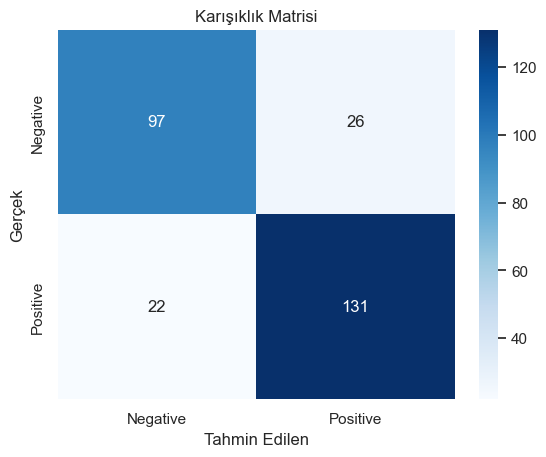

In [236]:
# Random Forest Karışıklık Matrisi (Heatmap)

y_pred_rand = rf_model.predict(X_test_rand_scaled)  # Test verisi üzerinde tahmin yap

print("\nSınıflandırma Raporu:\n", classification_report(y_test_rand, y_pred_rand))  
# Doğruluk, kesinlik, duyarlılık ve F1 skorlarını yazdır

cm = confusion_matrix(y_test_rand, y_pred_rand)  # Karışıklık matrisini oluştur

# Karışıklık matrisini ısı haritası (heatmap) olarak çiz
sns.heatmap(
    cm, 
    annot=True,             # Hücrelerin içinde sayıları göster
    fmt='d',                # Sayıları tam sayı olarak göster
    cmap='Blues',           # Mavi renk skalası kullan
    xticklabels=['Negative', 'Positive'],  # X ekseni etiketleri
    yticklabels=['Negative', 'Positive']   # Y ekseni etiketleri
)

plt.xlabel('Tahmin Edilen')            # X ekseni başlığı
plt.ylabel('Gerçek')                   # Y ekseni başlığı
plt.title('Karışıklık Matrisi')        # Grafik başlığı
plt.show()                             # Grafiği göster

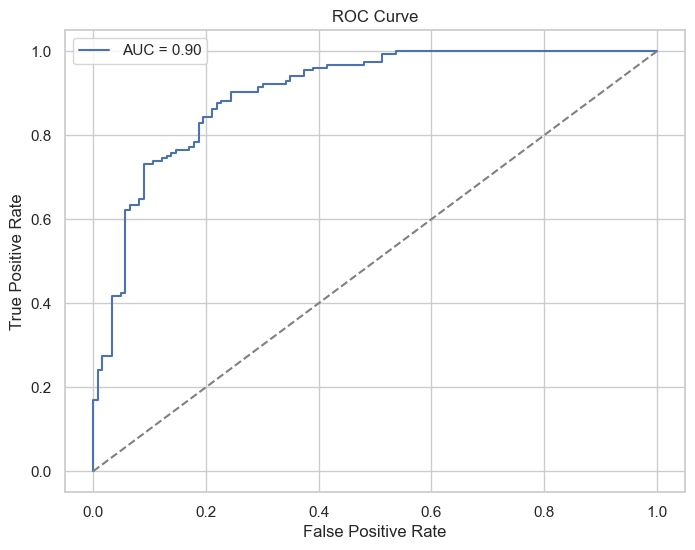

In [237]:
# Random Forest ROC Eğrisi ve AUC Skoru - AUC Skoru: 1’e ne kadar yakınsa, model o kadar iyi sınıflandırma yapıyor demektir.
# ROC Eğrisi: Modelin farklı eşiklerdeki ayırt etme gücünü gösterir.

# Pozitif sınıf (1) için olasılık tahmini alalım
y_proba_rand = rf_model.predict_proba(X_test_rand_scaled)[:, 1]  
# predict_proba iki sınıf için de olasılık verir; [1] ile pozitif sınıfın olasılığı alınır

# ROC eğrisi için gerekli değerleri al
fpr, tpr, thresholds = roc_curve(y_test_rand, y_proba_rand)  
# fpr: false positive rate, tpr: true positive rate, thresholds: eşik değerleri

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))  
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_rand, y_proba_rand):.2f}")  
# ROC eğrisini çiz ve AUC skorunu etikete ekle

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Rastgele tahmin çizgisi (referans)

plt.xlabel("False Positive Rate")   # X ekseni etiketi
plt.ylabel("True Positive Rate")    # Y ekseni etiketi
plt.title("ROC Curve")              # Grafik başlığı
plt.legend()                        # AUC etiketini göster
plt.grid(True)                      # Izgara çizgileri
plt.show()                          # Grafiği göster


**KNN (K-Nearest Neighbors)**

In [238]:
# -------------------------------
# KNN TEST SETİ TAHMİNİ VE METRİKLER
# -------------------------------

y_pred_knn_final1 = knn_final.predict(X_test_scaled_knn)  # Test verisi üzerinde tahmin yap

accuracy = accuracy_score(y_test_knn, y_pred_knn_final1)       # Doğruluk oranı (accuracy)
precision = precision_score(y_test_knn, y_pred_knn_final1)     # Kesinlik (precision)
recall = recall_score(y_test_knn, y_pred_knn_final1)           # Duyarlılık (recall)
f1 = f1_score(y_test_knn, y_pred_knn_final1)                   # F1 skoru (precision + recall dengesi)

# Sonuçları ekrana yazdır
print("\nKNN TEST SETİ PERFORMANSI")
print(f"KNN Accuracy:  {accuracy:.2f}")    # Doğruluk oranını yazdır
print(f"KNN Precision: {precision:.2f}")   # Kesinlik skorunu yazdır
print(f"KNN Recall:    {recall:.2f}")      # Duyarlılık skorunu yazdır
print(f"KNN F1 Score:  {f1:.2f}")          # F1 skorunu yazdır


KNN TEST SETİ PERFORMANSI
KNN Accuracy:  0.80
KNN Precision: 0.87
KNN Recall:    0.77
KNN F1 Score:  0.82


In [239]:
# -------------------------------------
# KNN OVERFITTING KONTROLÜ (Eğitim Verisi)
# -------------------------------------

y_train_pred_knn = knn_final.predict(X_train_scaled_knn)  # Eğitim verisi üzerinde tahmin yap

train_accuracy = accuracy_score(y_train_knn, y_train_pred_knn)      # Doğruluk oranı (Accuracy)
train_precision = precision_score(y_train_knn, y_train_pred_knn)    # Kesinlik (Precision)
train_recall = recall_score(y_train_knn, y_train_pred_knn)          # Duyarlılık (Recall)
train_f1 = f1_score(y_train_knn, y_train_pred_knn)                  # F1 skoru

# Eğitim seti üzerindeki performansı yazdır (Overfitting kontrolü amacıyla)
print("\nKNN EĞİTİM SETİ PERFORMANSI (Overfitting Kontrolü)")
print(f"KNN Train Accuracy : {train_accuracy:.2f}")     # Eğitim doğruluk oranı
print(f"KNN Train Precision: {train_precision:.2f}")    # Eğitim kesinlik skoru
print(f"KNN Train Recall   : {train_recall:.2f}")       # Eğitim duyarlılık skoru
print(f"KNN Train F1 Score : {train_f1:.2f}")           # Eğitim F1 skoru


KNN EĞİTİM SETİ PERFORMANSI (Overfitting Kontrolü)
KNN Train Accuracy : 0.84
KNN Train Precision: 0.85
KNN Train Recall   : 0.85
KNN Train F1 Score : 0.85



Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       120
           1       0.87      0.77      0.82       156

    accuracy                           0.80       276
   macro avg       0.80      0.81      0.80       276
weighted avg       0.81      0.80      0.81       276



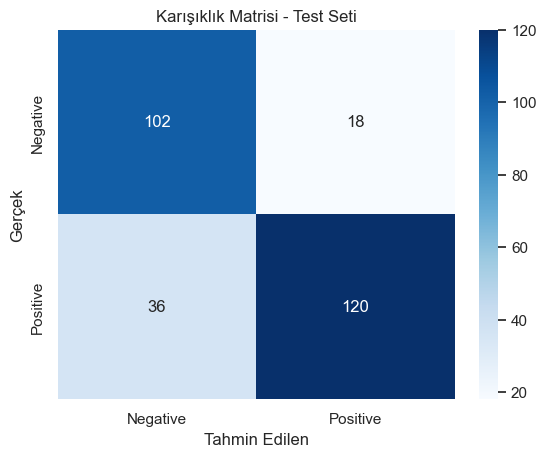

In [240]:
# KNN Karışıklık Matrisi ve Sınıflandırma Raporu

conf_matrix = confusion_matrix(y_test_knn, y_pred_knn_final1)  # Test seti için karışıklık matrisi oluştur

print("\nSınıflandırma Raporu:\n", classification_report(y_test_knn, y_pred_knn_final1))  
# Doğruluk, kesinlik, duyarlılık ve F1 skorlarını içeren raporu yazdır

# Karışıklık matrisini ısı haritası (heatmap) olarak görselleştir
sns.heatmap(
    conf_matrix,
    annot=True,             # Hücrelerin içine sayıları yaz
    fmt='d',                # Sayıları tam sayı olarak göster
    cmap='Blues',           # Mavi renk paleti kullan
    xticklabels=['Negative', 'Positive'],  # X ekseni etiketleri
    yticklabels=['Negative', 'Positive']   # Y ekseni etiketleri
)

plt.xlabel('Tahmin Edilen')         # X ekseni başlığı
plt.ylabel('Gerçek')                # Y ekseni başlığı
plt.title('Karışıklık Matrisi - Test Seti')  # Grafik başlığı
plt.show()                          # Grafiği göster

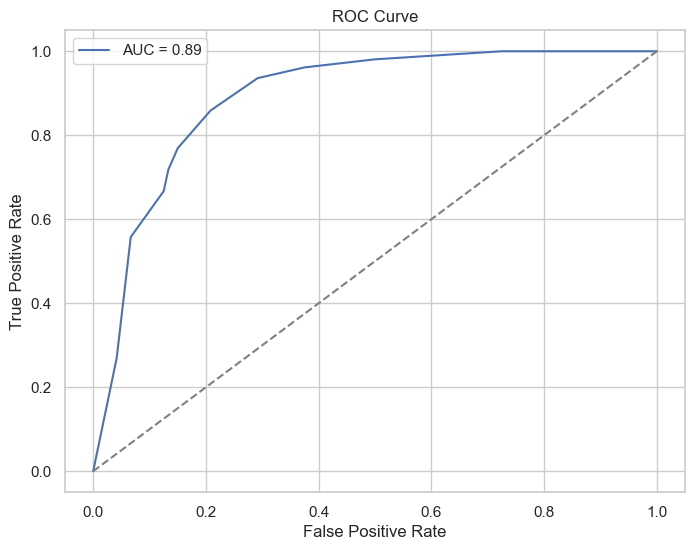

In [241]:
# KNN (K-Nearest Neighbors) ROC Curve ve AUC Skoru - AUC Skoru: 1’e ne kadar yakınsa, model o kadar iyi sınıflandırma yapıyor demektir.
# ROC Eğrisi: Modelin farklı eşiklerdeki ayırt etme gücünü gösterir.

# Pozitif sınıf (1) için olasılık tahmini al
y_proba_knn = knn_final.predict_proba(X_test_scaled_knn)[:, 1]  
# predict_proba fonksiyonu, her sınıf için olasılık döndürür → [1] pozitif sınıfın olasılığı

# ROC eğrisi için gerekli metrikleri al: fpr = false positive rate, tpr = true positive rate
fpr, tpr, thresholds = roc_curve(y_test_knn, y_proba_knn)

# ROC eğrisini çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_knn, y_proba_knn):.2f}")  
# ROC eğrisini çiz ve AUC skorunu etiket olarak ekle

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Rastgele tahmin referans çizgisi
plt.xlabel("False Positive Rate")   # X ekseni etiketi
plt.ylabel("True Positive Rate")    # Y ekseni etiketi
plt.title("ROC Curve")              # Grafik başlığı
plt.legend()                        # AUC skoru etiketi
plt.grid(True)                      # Izgara çizgilerini göster
plt.show()                          # Grafiği çiz

#### **5. Model Karşılaştırması**
- **5.1. Hangi model daha iyi performans verdi?**
- **5.2. Hangi metrik üzerinde öne çıktı?**
- **5.3. Aşırı öğrenme veya yetersiz öğrenme gözlendi mi?**

**5.1. Hangi model daha iyi performans verdi?**

Genel değerlendirme: Random Forest modeli en iyi genel performansı göstermiştir.

| Model                   | Accuracy | Precision | Recall   | F1 Score | AUC      | TN      | FP     | FN     | TP      |
| ----------------------- | -------- | --------- | -------- | -------- | -------- | ------- | ------ | ------ | ------- |
| **Logistic Regression** | 0.80     | 0.84      | 0.80     | 0.82     | 0.87     | 96      | 24     | 31     | 125     |
| **Random Forest**       | **0.83** | 0.83      | **0.86** | **0.85** | **0.90** | 97      | 26     | **22** | **131** |
| **KNN**                 | 0.80     | **0.87**  | 0.77     | 0.82     | 0.89     | **102** | **18** | 36     | 120     |


- Accuracy: Random Forest en yüksek doğruluk oranına sahip (0.83).

- F1 Score: Random Forest precision ve recall dengesinde en iyi sonucu verdi (0.85).

- AUC (ROC): Random Forest 0.90 ile en yüksek ayırma gücüne sahip.

- TP ve FN: Random Forest en fazla doğru pozitif (131) ve en az yanlış negatif (22) sayısına sahip, yani pozitif sınıfı en iyi yakalayan model.

- KNN yüksek precision değerine sahip ancak recall düşük; yani pozitifleri biraz daha kaçırıyor.

Sonuç: Random Forest modeli genel olarak diğer modellere göre daha iyi performans göstermiştir.


**5.2. Hangi metrik üzerinde öne çıktı?**

Öne çıkan metrikler: AUC ve F1 Score

AUC (Area Under Curve) sınıflar arası ayrım gücünü ölçer. Random Forest en yüksek AUC (0.90) değerine sahip, bu modelin pozitif ve negatif sınıfları daha başarılı ayırdığı anlamına gelir.

F1 Score precision ve recall dengesini ölçtüğü için özellikle dengesiz sınıflarda kritik öneme sahiptir. Burada Random Forest en yüksek F1 skorunu verdi (0.85).

KNN modelinde precision yüksek (0.87), fakat recall daha düşük (0.77), yani pozitif sınıflardan biraz daha fazlasını kaçırıyor.

Logistic Regression ise dengeli bir performans sunuyor ancak Random Forest kadar başarılı değil.

Sonuç: Sınıflar arası ayrım ve dengesiz sınıf problemleri açısından AUC ve F1 Score metrikleri karşılaştırmada belirleyici olmuştur.

**5.3. Aşırı öğrenme veya yetersiz öğrenme gözlendi mi?**

**Overfitting olduğu durumları nasıl anlarız?**
- Eğitim Seti ve Test Seti arasında ciddi fark varsa overfitting olmuş demektir.
    
ÖRN:
- Accuracy	Eğitim: %90+, Test: %70 veya daha düşük
- F1 Score	Eğitim: %90+, Test: %70 veya daha düşük

gibi bir senaryoda overfitting olur.

- Aradaki fark ne kadar olmalıdır:
    - Fark > %10-15 ise	Genellikle overfitting için bir işarettir.
    - Fark > %20 ise Güçlü overfitting ihtimali
    - Fark < %5 ise Genellikle overfitting yok, model genelleniyor.

**Underfitting olduğu durumları nasıl anlarız?**
- Underfitting (yetersiz öğrenme), modelin ne eğitim verisini ne de test verisini iyi öğrenemediği durumdur. Yani model karmaşıklığı verinin yapısını yakalamaya yetmez.

ÖRN: 
- Accuracy	Eğitim: 0.61, Test: 0.60	❌ Underfitting, öğrenememiş
- Accuracy	Eğitim: 0.85, Test: 0.60	⚠️ Overfitting
- Accuracy	Eğitim: 0.85, Test: 0.83	✅ Dengeli (ideal)

- Underfitting Durumları:
    - Düşük eğitim skorları = Model eğitim setinde bile düşük başarı gösterir.
    - Düşük test skorları	= Test başarısı da düşüktür.
    - Eğitim ve test skorları benzer ama düşük = Bu, modelin genel olarak veriye adapte olamadığını gösterir.
    - F1, accuracy, recall gibi metriklerin hepsi düşük = Model yetersiz tahminleme yapıyor olabilir.

**Fark Ne Kadar Olursa Underfitting Deriz?**

Aslında underfitting tanısı farktan çok, skorların mutlak değerlerine dayanır. Yani:

- Eğitim skorun 0.70’in altındaysa ve test skorun da düşükse (örneğin 0.60), model yeterince öğrenememiş olabilir.

- Eğitim ≈ Test, ama ikisi de düşükse → bu underfitting göstergesidir.

- Eğer hem eğitim hem test skoru düşükse (özellikle F1, recall gibi metrikler de) bu genellikle güçlü bir underfitting işaretidir.

**Logistic Regression:**

- Eğitim/Test Accuracy farkı: 0.83 - 0.80 = 0.03 (küçük)

- Eğitim/Test F1 Score farkı: 0.85 - 0.82 = 0.03 (küçük)

Yorum: Küçük farklar var, overfitting yok, model iyi genelleme yapıyor.

**Random Forest:**

- Eğitim/Test Accuracy farkı: 0.85 - 0.83 = 0.02 (çok küçük)

- Eğitim/Test F1 Score farkı: 0.87 - 0.85 = 0.02 (çok küçük)

Yorum: Skorlar çok yakın, overfitting veya underfitting yok, çok iyi genelleme.

**KNN:**

- Eğitim/Test Accuracy farkı: 0.84 - 0.80 = 0.04 (kabul edilebilir)

- Eğitim/Test F1 Score farkı: 0.85 - 0.82 = 0.03 (kabul edilebilir)

Yorum: Küçük fark var, overfitting belirtisi yok, model genelleme yapabiliyor.

**Genel Sonuç:**

Hiçbir modelde belirgin aşırı öğrenme (overfitting) veya yetersiz öğrenme (underfitting) gözlenmemiştir. **Random Forest en dengeli ve başarılı model olarak öne çıkmaktadır.**

#### **6. Sonuç ve Yorumlar**

- **6.1. Modelin pratik kullanımı hakkında değerlendirme**
- **6.2. Daha iyi sonuçlar için neler yapılabilir?**
- **6.3.Veri setiyle ilgili gözlemler**


**6.1. Modelin pratik kullanımı hakkında değerlendirme**

**Genel Durum:**

Tüm modeller (%80 ve üzeri doğrulukla) test verisinde başarılı sonuçlar vermiştir.

Overfitting veya underfitting gözlenmemiştir, yani modeller genelleme yeteneğine sahiptir.

Random Forest, hem test hem de eğitim skorları açısından en istikrarlı ve dengeli sonuçları verdi.

**Pratik Uygulama Önerisi:**
    
- Random Forest, sağlık verileri gibi yorumlanabilirliğin önemli olduğu alanlarda yüksek doğruluk ve güvenilirlik sunduğu için tercih edilebilir bir modeldir.

- Logistic Regression, daha basit ve yorumlanabilir bir modeldir.

- KNN, özellikle precision’ın önemli olduğu senaryolarda (örneğin, yanlış pozitiflerin daha az istenildiği durumlar) avantajlı olabilir, ancak ölçeklenebilirlik açısından büyük veri setlerinde zayıf kalabilir.

**Sonuç: Pratik uygulamalarda model seçimi hedefe göre değişse de, Random Forest şu anki durumda en dengeli ve uygulanabilir modeldir.**

**6.2. Daha iyi sonuçlar için neler yapılabilir?**

Daha iyi sonuçlar almak adına şu adımlar gerçekleştirilebilir.

**1. Feature Engineering (Özellik mühendisliği)**

Şu anda sadece temel değişkenlerle çalışılıyor gibi görünüyor.

Yeni değişkenler türetmek (örneğin: yaş grupları, kolesterol seviyesi kategorisi, tansiyon farkları gibi) modellerin öğrenme gücünü artırabilir.

**2. Feature Selection (Gereksiz Değişkenleri Eleme)**

Çok düşük korelasyona sahip değişkenler (örneğin yaş ile kolesterol arasında anlamlı ilişki gözükmemekte) modelden çıkarılabilir.

Gereksiz değişkenlerin çıkarılması modelin hızını artırır, aşırı öğrenme riskini azaltır.

**3. Model Parametre Optimizasyonu**

Özellikle Random Forest ve KNN gibi modeller için:

GridSearchCV veya RandomizedSearchCV ile hiperparametre optimizasyonu yapılabilir.

Bu sayede doğruluk, recall gibi metriklerde gelişme sağlanabilir.

**4. Veri Dengesi Kontrolü**

Hedef değişkende dengesizlik (örneğin pozitif/negatif sınıflar) varsa, SMOTE veya class_weight gibi tekniklerle bu dengesizlik giderilerek model performansı artırılabilir.

**6.3.Veri setiyle ilgili gözlemler**

**1. Weak Correlations (Zayıf İlişkiler):**

Scatter plot analizlerinde hem yaş ile istirahat kan basıncı, hem de yaş ile kolesterol arasında güçlü bir ilişki görülmemiştir.

Bu değişkenler arasında belirgin bir doğrusal yapı yoktur, bu nedenle modelde etkileri sınırlı olabilir.

**2. Aykırı Değerler:**

Özellikle kolesterol (chol_wins) değerlerinde:

50 mg/dL'de çok sayıda nokta yer almakta. Bu, muhtemelen eksik veri yerine sabit bir değer (örneğin winsorization) kullanıldığını gösteriyor.

400 mg/dL üzeri değerler de dikkat çekici; bu tür aykırı değerler modele zarar verebilir. Temizlenmesi veya sınırlanması gerekebilir.

**3. Veri Yoğunluğu 50–60 yaş grubunda toplanmış:**

Veri yaş açısından çok dengeli değil. Çoğu gözlem orta yaş grubu bireylere ait. Bu da modeli yaşa göre genellemekte zorlayabilir.

Yaş gruplarına bölünerek daha dengeli sınıflandırma yapılabilir (örn: genç–orta yaş–yaşlı gibi).

#### **7. Ekstra**
- **7.1. GridSearchCV ile hiperparametre optimizasyonu**
- **7.2. Feature Importance görselleştirmesi (özellikle Random Forest ile)**


**7.1. GridSearchCV ile hiperparametre optimizasyonu**

 GridSearchCV = 5 katlı çapraz doğrulama ile en iyi F1 skorunu bulur.

In [242]:
# Gerekli kütüphaneleri yükleyelim

from sklearn.model_selection import GridSearchCV      # Hiperparametre optimizasyonu için GridSearchCV
from sklearn.ensemble import RandomForestClassifier   # Random Forest sınıflandırma algoritması
from sklearn.metrics import classification_report     # Sınıflandırma raporu (precision, recall, f1-score)

In [243]:
# Model ve Parametre Aralığını Tanımlayalım
# Bir Random Forest modeli için:

model = RandomForestClassifier(random_state=42)  
# Random Forest sınıflandırıcısını tanımla, random_state sabitlenerek tekrarlanabilirlik sağlanır

param_grid = {
    'n_estimators': [50, 100, 200],           # Ağaç sayısı (modelde kaç tane karar ağacı olacak)
    'max_depth': [None, 10, 20, 30],          # Her ağacın maksimum derinliği (None = sınırsız)
    'min_samples_split': [2, 5, 10],          # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4],            # Yaprak düğümde bulunması gereken minimum örnek sayısı
    'bootstrap': [True, False]                 # Örneklemede bootstrap (yeniden örnekleme) kullanımı
}

In [244]:
# GridSearchCV Nesnesini Oluşturalım

grid_search = GridSearchCV(
    estimator=model,          # Model olarak Random Forest kullanılıyor
    param_grid=param_grid,    # Denenecek hiperparametre kombinasyonları
    cv=5,                    # 5 katlı çapraz doğrulama (cross-validation)
    scoring='f1',            # Model değerlendirmede F1 skorunu optimize et
    n_jobs=-1,               # Tüm CPU çekirdeklerini paralel kullan
    verbose=2                # İşlem sırasında detaylı çıktı ver
)

In [245]:
# Modeli eğitelim (fit edelim)

grid_search.fit(X_train, y_train)  # Eğitim verisi üzerinde GridSearchCV ile hiperparametre araması yap ve modeli eğit

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [246]:
# En İyi Parametreleri ve Sonuçları Görüntüle

print("En iyi parametreler:")
print(grid_search.best_params_)  # GridSearch sonucu bulunan en iyi hiperparametreler

print("\nEn iyi F1 skoru:")
print(grid_search.best_score_)   # En iyi modelin çapraz doğrulama sonucu F1 skoru

En iyi parametreler:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}

En iyi F1 skoru:
0.8406192668914908


In [247]:
# Test Seti Üzerinde Performansı Değerlendirelim 

best_model = grid_search.best_estimator_  # GridSearch ile bulunan en iyi modeli al

y_pred_g = best_model.predict(X_test)        # Test verisi üzerinde tahmin yap

print("Test seti sonuçları:")
print(classification_report(y_test, y_pred_g))  # Test sonuçlarının detaylı sınıflandırma raporu

Test seti sonuçları:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       120
           1       0.86      0.85      0.86       156

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276




Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       120
           1       0.86      0.85      0.86       156

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



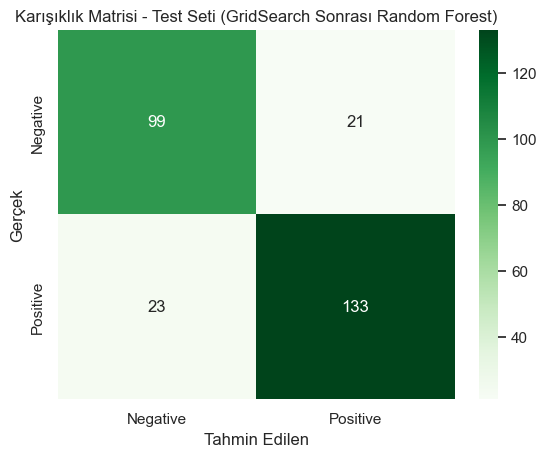

In [248]:
# Sınıflandırma raporu ve karışıklık matrisi

conf_matrix = confusion_matrix(y_test, y_pred_g)  # Test seti için karışıklık matrisi hesapla

print("\nSınıflandırma Raporu:\n", classification_report(y_test, y_pred_g))  
# Doğruluk, kesinlik, duyarlılık ve F1 skorlarını içeren raporu yazdır

# Karışıklık matrisini ısı haritası (heatmap) olarak görselleştir
sns.heatmap(
    conf_matrix,
    annot=True,                # Hücrelerin içine sayıları yaz
    fmt='d',                  # Sayıları tam sayı olarak göster
    cmap='Greens',            # Yeşil tonlarında renk paleti kullan
    xticklabels=['Negative', 'Positive'],  # X ekseni etiketleri
    yticklabels=['Negative', 'Positive']   # Y ekseni etiketleri
)

plt.xlabel('Tahmin Edilen')       # X ekseni başlığı
plt.ylabel('Gerçek')              # Y ekseni başlığı
plt.title('Karışıklık Matrisi - Test Seti (GridSearch Sonrası Random Forest)')  # Grafik başlığı
plt.show()                        # Grafiği göster

**Sınıf Bazlı Performans Ölçümü**

Accuracy: %84 gayet iyi bir doğruluk değeri sunmaktadır.

- Sınıf 0 (Negative / Gerçek sınıf “0” olanlar):
    - Precision (%81):
    Modelin "negatif" tahminlerinin %81’i gerçekten negatif.
    (Yani 120 negatiften 99’unu doğru, 21’ini yanlış pozitif olarak tahmin etmiş.)

    - Recall (%82):
    Gerçek negatiflerin %82’sini doğru tahmin etmiş.

    - F1-Score (%82):
    Precision ve Recall dengesini yansıtır. Dengeli bir başarı var.

- Sınıf 1 (Positive / Gerçek sınıf “1” olanlar):
    - Precision (%86):
    Modelin “pozitif” tahminlerinin %86’sı gerçekten pozitif.
    (156 pozitiften 133’ü doğru, 23’ü yanlış negatif.)

    - Recall (%85):
    Gerçek pozitiflerin %85’i doğru tahmin edilmiş.

    - F1-Score (%86):
    Pozitif sınıf için daha iyi sonuç elde edilmiş.


**True Negative (TN) – 99 kişi:**

Model, gerçekten hasta olmayan 99 kişiyi doğru bir şekilde “negatif” yani hasta değil olarak tahmin etmiş.
- Bu, modelin sağlıklı bireyleri doğru tanıma yeteneğini gösterir.
- TN sayısının yüksek olması, gereksiz panik, test veya tedaviyi azaltır.

**False Positive (FP) – 21 kişi:**
Bu kişiler hasta değilken, model onları hatalı şekilde hasta (pozitif) tahmin etmiş.
- Bu tür hatalar, kişilere gereksiz stres, ek testler veya tedavi maliyeti doğurabilir.
- Ancak sağlık alanında bu hata, FN’ye göre daha az risklidir.

**False Negative (FN) – 23 kişi:**
Bu 23 kişi gerçekten hasta, ama model onları hasta değil sanmış.
- Bu, en kritik hata türüdür çünkü hastalık gözden kaçabilir ve tedavi gecikebilir.
- FN sayısının mümkün olduğunca düşük olması gerekir, özellikle tıbbi uygulamalarda.

**True Positive (TP) – 133 kişi:**
Model, gerçekten hasta olan 133 kişiyi doğru şekilde pozitif tahmin etmiş.
- Bu da modelin hastaları tespit etme yeteneğini gösterir ve en önemli başarı kriterlerinden biridir.

**Genel Yorum:**
Modelin TN ve TP sayısı oldukça yüksek: Bu, genel doğruluğun (accuracy: %84) neden iyi olduğunu açıklıyor.

Ancak FN (23 kişi) biraz yüksek. Bu da Recall oranını düşürüyor ve hastaları kaçırma riski taşıyor.

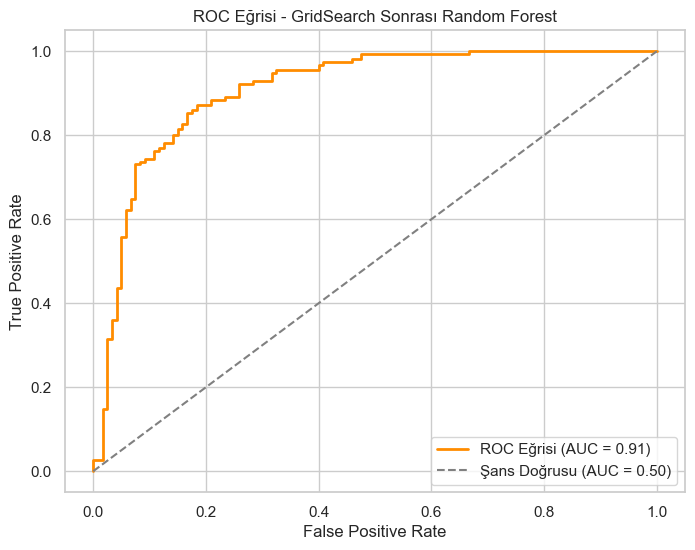

In [249]:
# ROC Eğrisi ve AUC Skoru - - AUC Skoru: 1’e ne kadar yakınsa, model o kadar iyi sınıflandırma yapıyor demektir.
# ROC Eğrisi: Modelin farklı eşiklerdeki ayırt etme gücünü gösterir.

y_proba_rf = best_model.predict_proba(X_test)[:, 1]  # Pozitif sınıf için olasılık tahmini al
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)  # ROC eğrisi için FPR ve TPR değerlerini hesapla
auc_score = roc_auc_score(y_test, y_proba_rf)        # AUC (Area Under Curve) skorunu hesapla

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Eğrisi (AUC = {auc_score:.2f})')  
# ROC eğrisini çiz, AUC skorunu etikete ekle

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Şans Doğrusu (AUC = 0.50)')  
# Rastgele tahmin çizgisi

plt.xlabel('False Positive Rate')    # X ekseni etiketi
plt.ylabel('True Positive Rate')     # Y ekseni etiketi
plt.title('ROC Eğrisi - GridSearch Sonrası Random Forest')  # Grafik başlığı
plt.legend(loc='lower right')         # Legend konumu
plt.grid(True)                       # Izgara çizgileri
plt.show()                          # Grafiği göster

**Yorumlayalım:**

AUC (Area Under Curve) sınıflar arası ayrım gücünü ölçer. Random Forest en yüksek AUC (0.91) değerine sahip, bu modelin pozitif ve negatif sınıfları daha başarılı ayırdığı anlamına gelir.

**7.2. Feature Importance görselleştirmesi (özellikle Random Forest ile)**

- Feature Importance, bir makine öğrenmesi modelinde her bir özelliğin (bağımsız değişkenin), modelin tahmin performansına ne kadar katkı sağladığını gösterir.

- Özellikle ağaç tabanlı modeller (Random Forest, XGBoost, LightGBM vb.) için çok güçlü ve anlaşılır bir yöntemdir.

- Random Forest modeli, her bir özelliğin modele ne kadar bilgi kazandırdığını “gini importance” ya da “mean decrease impurity” gibi ölçütlerle hesaplar.

Aşağıdaki işlemler, daha önce GridSearchCV ile eğitilmiş olan en iyi Random Forest modeli (best_rf_model) üzerinden feature importance görselleştirmesini yapmaktadır.

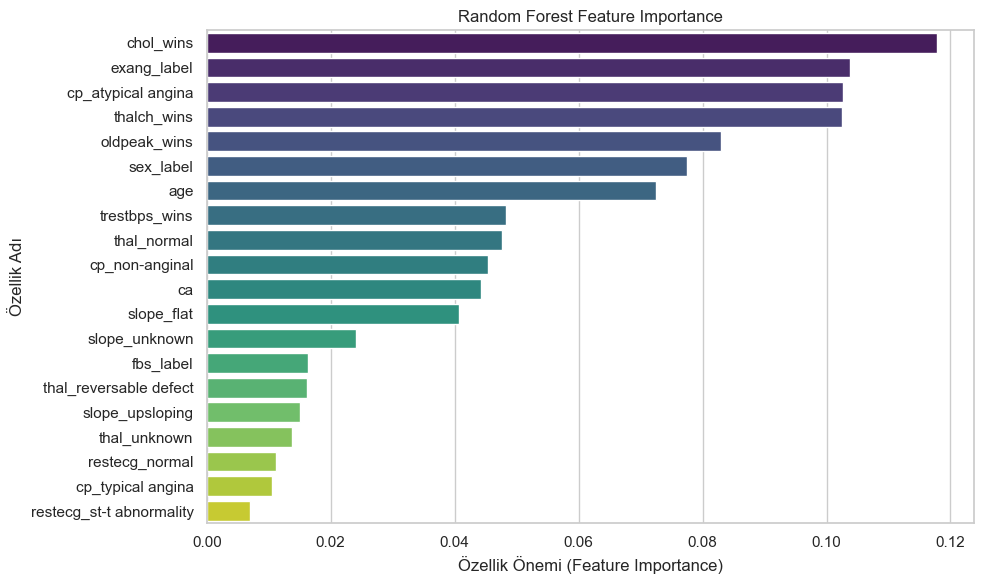

In [250]:
# 1. Özellik önemlerini al
importances = best_model.feature_importances_  # Modelin her özelliğe verdiği önem skorlarını al

# 2. Özellik isimleri ile eşleştir (X_train'in sütun isimlerini kullan)
feature_names = X_train.columns                 # Eğitim verisindeki özelliklerin isimlerini al
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,                    # Özellik isimleri
    'Importance': importances                     # İlgili önem skorları
})

# 3. Önem sırasına göre sırala
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)  # En önemli özellikler yukarıda

# 4. Görselleştir
plt.figure(figsize=(10, 6))                      # Grafik boyutunu ayarla
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')  # Barplot ile önemleri göster
plt.title('Random Forest Feature Importance')   # Grafik başlığı
plt.xlabel('Özellik Önemi (Feature Importance)') # X ekseni başlığı
plt.ylabel('Özellik Adı')                         # Y ekseni başlığı
plt.tight_layout()                                # Düzeni sıkıştır, grafik sığsın diye
plt.show()                                        # Grafiği göster


**Grafik Yorum:**

Yukarıdaki grafik, Random Forest algoritması kullanılarak yapılan bir sınıflandırma modelinde özelliklerin (feature'ların) önem düzeylerini göstermektedir. Bu sayede hangi özelliklerin modelin karar verme sürecinde daha etkili olduğunu görebiliyoruz.

**En Önemli Özellikler (Model için en etkili ilk 5 özellik):**
- chol_wins – Kolesterol değerine ait bir işlem sonucu olabilir; en yüksek öneme sahip (~%11.5 civarında).
- exang_label – Egzersize bağlı anjina olup olmaması. Modelin kararını etkileyen önemli bir faktör.
- cp_atypical angina – Göğüs ağrısı türlerinden biri; kalp hastalıklarında önemli bir belirleyici.
- thalch_wins – Maksimum kalp atım hızıyla ilişkili bir özellik olabilir.
- oldpeak_wins – Egzersize bağlı ST depresyonunun ölçümü. Kalp rahatsızlıklarında belirleyici bir faktör.

Bu 5 özellik, modelin öğrenme sürecinde en çok bilgi sağlayan faktörlerdir.

Bu grafik, Random Forest modelinin hangi verilere daha çok "güvendiğini" gösteriyor. Özellikle kolesterol, egzersize bağlı anjina, göğüs ağrısı türleri ve kalp ritmi ile ilgili veriler modelin sınıflandırma kararlarında en etkili faktörlerdir. En az önemli olan özellikler ise muhtemelen daha az varyasyon içeriyor ya da sınıflar arasında ayrım gücü düşük.